# COMPAS Data Analysis

In [47]:
import sqlite3
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
# Create your connection.
cnx = sqlite3.connect('../data//compas/compas.db')

df = pd.read_sql_query("SELECT * FROM compas", cnx)
df = df.drop_duplicates()
df.head()
df2 = pd.read_csv('../data/compas/compas-scores.csv')

df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 37578 entries, 0 to 37577
Data columns (total 21 columns):
id                            37578 non-null int64
first                         37578 non-null object
last                          37578 non-null object
compas_person_id              37578 non-null int64
compas_case_id                37578 non-null int64
compas_assessment_id          37578 non-null int64
agency_text                   37578 non-null object
scale_set                     37578 non-null object
assessment_reason             37578 non-null object
legal_status                  37578 non-null object
custody_status                37578 non-null object
marital_status                37578 non-null object
screening_date                37578 non-null object
rec_supervision_level         37578 non-null int64
rec_supervision_level_text    37578 non-null object
score_text                    37578 non-null object
scale_id                      37578 non-null int64
type_of_asses

In [48]:
df.head(9)

,id,first,last,compas_person_id,compas_case_id,compas_assessment_id,agency_text,scale_set,assessment_reason,legal_status,...,marital_status,screening_date,rec_supervision_level,rec_supervision_level_text,score_text,scale_id,type_of_assessment,raw_score,decile_score,person_id
0,1,miguel,hernandez,56418,58393,64352,PRETRIAL,Risk and Prescreen,Intake,Pretrial,...,Single,2013-08-14 00:00:00.000000,1,Low,Low,7,Risk of Violence,-4.31,1,1
1,2,miguel,hernandez,56418,58393,64352,PRETRIAL,Risk and Prescreen,Intake,Pretrial,...,Single,2013-08-14 00:00:00.000000,1,Low,Low,8,Risk of Recidivism,-2.78,1,1
2,3,miguel,hernandez,56418,58393,64352,PRETRIAL,Risk and Prescreen,Intake,Pretrial,...,Single,2013-08-14 00:00:00.000000,1,Low,Low,18,Risk of Failure to Appear,13.00,1,1
3,4,michael,ryan,68603,72042,79669,PRETRIAL,Risk and Prescreen,Intake,Pretrial,...,Single,2014-12-31 00:00:00.000000,1,Low,Low,7,Risk of Violence,-2.75,2,2
4,5,michael,ryan,68603,72042,79669,PRETRIAL,Risk and Prescreen,Intake,Pretrial,...,Single,2014-12-31 00:00:00.000000,1,Low,Medium,8,Risk of Recidivism,-0.34,5,2
5,6,michael,ryan,68603,72042,79669,PRETRIAL,Risk and Prescreen,Intake,Pretrial,...,Single,2014-12-31 00:00:00.000000,1,Low,Low,18,Risk of Failure to Appear,16.00,2,2
6,7,kevon,dixon,51601,52796,58102,PRETRIAL,Risk and Prescreen,Intake,Pretrial,...,Single,2013-01-27 00:00:00.000000,1,Low,Low,7,Risk of Violence,-3.07,1,3
7,8,kevon,dixon,51601,52796,58102,PRETRIAL,Risk and Prescreen,Intake,Pretrial,...,Single,2013-01-27 00:00:00.000000,1,Low,Low,8,Risk of Recidivism,-0.76,3,3
8,9,kevon,dixon,51601,52796,58102,PRETRIAL,Risk and Prescreen,Intake,Pretrial,...,Single,2013-01-27 00:00:00.000000,1,Low,Medium,18,Risk of Failure to Appear,25.00,6,3


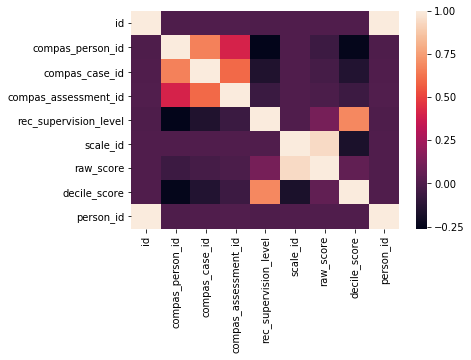

In [49]:
#df.custody_status.describe().unique()
#df.custody_status.value_counts() # Inmate, Pretrial, Defendant, ... 6 total
#df.scale_id.value_counts() #assesment type spexcific
df.rec_supervision_level.value_counts() #1,2,3,4
#df.rec_supervision_level_text.value_counts() matching rec_supervision_level (Low, Med, Med w/ Override considerartion high)
#df.raw_score.value_counts() # 650 total, highest frequency betweetn 15 and 30 ????
#df.screening_date.value_counts()

corr = df.corr()
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)

In [50]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11757 entries, 0 to 11756
Data columns (total 47 columns):
id                         11757 non-null int64
name                       11757 non-null object
first                      11757 non-null object
last                       11757 non-null object
compas_screening_date      11757 non-null object
sex                        11757 non-null object
dob                        11757 non-null object
age                        11757 non-null int64
age_cat                    11757 non-null object
race                       11757 non-null object
juv_fel_count              11757 non-null int64
decile_score               11757 non-null int64
juv_misd_count             11757 non-null int64
juv_other_count            11757 non-null int64
priors_count               11757 non-null int64
days_b_screening_arrest    10577 non-null float64
c_jail_in                  10577 non-null object
c_jail_out                 10577 non-null object
c_case_number  

In [51]:
df2.is_recid.value_counts()
df2.is_violent_recid.value_counts()

0    10875
1      882
Name: is_violent_recid, dtype: int64

In [52]:
#df.loc[df['first'].isin(['miguel'])]
tmp = df2.loc[df2['is_recid']==1]#.count()#.isin(['1'])].count()
tmp.count()
tmp = tmp.loc[tmp['is_violent_recid']==1]
tmp.count()

id                         882
name                       882
first                      882
last                       882
compas_screening_date      882
sex                        882
dob                        882
age                        882
age_cat                    882
race                       882
juv_fel_count              882
decile_score               882
juv_misd_count             882
juv_other_count            882
priors_count               882
days_b_screening_arrest    864
c_jail_in                  864
c_jail_out                 864
c_case_number              878
c_offense_date             728
c_arrest_date              150
c_days_from_compas         878
c_charge_degree            882
c_charge_desc              878
is_recid                   882
num_r_cases                  0
r_case_number              882
r_charge_degree            882
r_days_from_arrest         646
r_offense_date             882
r_charge_desc              881
r_jail_in                  646
r_jail_o


# I conclude that only 'recid' inmates can be 'violent_recid'



In [53]:
tmp = df2.loc[df2['c_jail_in'] > df2['r_jail_in']]
tmp.count()

id                         168
name                       168
first                      168
last                       168
compas_screening_date      168
sex                        168
dob                        168
age                        168
age_cat                    168
race                       168
juv_fel_count              168
decile_score               168
juv_misd_count             168
juv_other_count            168
priors_count               168
days_b_screening_arrest    168
c_jail_in                  168
c_jail_out                 168
c_case_number              168
c_offense_date             110
c_arrest_date               58
c_days_from_compas         168
c_charge_degree            168
c_charge_desc              167
is_recid                   168
num_r_cases                  0
r_case_number              168
r_charge_degree            168
r_days_from_arrest         168
r_offense_date             168
r_charge_desc              167
r_jail_in                  168
r_jail_o

# Some seem to manage to get in jail again before they even got out... parole?

In [54]:
tmp = df2.loc[df2['r_offense_date'].isna()] == True#.value_counts()
tmp = tmp.loc[tmp['is_recid']==0]
tmp.count()

id                         8054
name                       8054
first                      8054
last                       8054
compas_screening_date      8054
sex                        8054
dob                        8054
age                        8054
age_cat                    8054
race                       8054
juv_fel_count              8054
decile_score               8054
juv_misd_count             8054
juv_other_count            8054
priors_count               8054
days_b_screening_arrest    8054
c_jail_in                  8054
c_jail_out                 8054
c_case_number              8054
c_offense_date             8054
c_arrest_date              8054
c_days_from_compas         8054
c_charge_degree            8054
c_charge_desc              8054
is_recid                   8054
num_r_cases                8054
r_case_number              8054
r_charge_degree            8054
r_days_from_arrest         8054
r_offense_date             8054
r_charge_desc              8054
r_jail_i

# If a person has no r_charge_degree, she is not recid (0 or n/a)

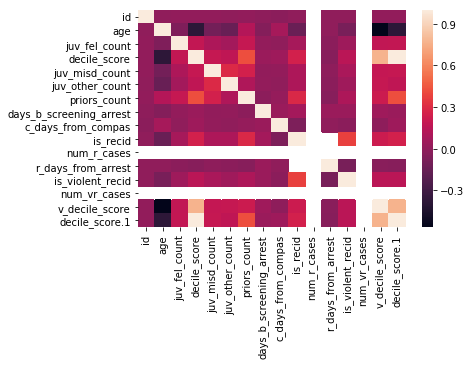

In [55]:
corr = df2.corr()
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)

In [56]:
df2.head(10)

,id,name,first,last,compas_screening_date,sex,dob,age,age_cat,race,...,vr_offense_date,vr_charge_desc,v_type_of_assessment,v_decile_score,v_score_text,v_screening_date,type_of_assessment,decile_score.1,score_text,screening_date
0,1,miguel hernandez,miguel,hernandez,2013-08-14,Male,1947-04-18,69,Greater than 45,Other,...,NaN,NaN,Risk of Violence,1,Low,2013-08-14,Risk of Recidivism,1,Low,2013-08-14
1,2,michael ryan,michael,ryan,2014-12-31,Male,1985-02-06,31,25 - 45,Caucasian,...,NaN,NaN,Risk of Violence,2,Low,2014-12-31,Risk of Recidivism,5,Medium,2014-12-31
2,3,kevon dixon,kevon,dixon,2013-01-27,Male,1982-01-22,34,25 - 45,African-American,...,2013-07-05,Felony Battery (Dom Strang),Risk of Violence,1,Low,2013-01-27,Risk of Recidivism,3,Low,2013-01-27
3,4,ed philo,ed,philo,2013-04-14,Male,1991-05-14,24,Less than 25,African-American,...,NaN,NaN,Risk of Violence,3,Low,2013-04-14,Risk of Recidivism,4,Low,2013-04-14
4,5,marcu brown,marcu,brown,2013-01-13,Male,1993-01-21,23,Less than 25,African-American,...,NaN,NaN,Risk of Violence,6,Medium,2013-01-13,Risk of Recidivism,8,High,2013-01-13
5,6,bouthy pierrelouis,bouthy,pierrelouis,2013-03-26,Male,1973-01-22,43,25 - 45,Other,...,NaN,NaN,Risk of Violence,1,Low,2013-03-26,Risk of Recidivism,1,Low,2013-03-26
6,7,marsha miles,marsha,miles,2013-11-30,Male,1971-08-22,44,25 - 45,Other,...,NaN,NaN,Risk of Violence,1,Low,2013-11-30,Risk of Recidivism,1,Low,2013-11-30
7,8,edward riddle,edward,riddle,2014-02-19,Male,1974-07-23,41,25 - 45,Caucasian,...,NaN,NaN,Risk of Violence,2,Low,2014-02-19,Risk of Recidivism,6,Medium,2014-02-19
8,9,steven stewart,steven,stewart,2013-08-30,Male,1973-02-25,43,25 - 45,Other,...,NaN,NaN,Risk of Violence,3,Low,2013-08-30,Risk of Recidivism,4,Low,2013-08-30
9,10,elizabeth thieme,elizabeth,thieme,2014-03-16,Female,1976-06-03,39,25 - 45,Caucasian,...,NaN,NaN,Risk of Violence,1,Low,2014-03-16,Risk of Recidivism,1,Low,2014-03-16


In [63]:
AA = df2[(df2['race'] == 'African-American')]
aa_total = AA.count()[1]
AA = AA[(AA['is_recid'] == 0.0)] #Reality: DID NOT RECIDIVISE
aa_n = AA.count()[1] #total number of Non-Recidivisors no matter what the prediction was
AA = AA[(AA['decile_score'] > 5)] #Prediction: WILL BE RECID
aa_fp = AA.count()[1] #number of Non-Recidivisors who were predicted recidivists
print(aa_fp, aa_n, aa_total)

C = df2[(df2['race'] == 'Caucasian')]
c_total = C.count()[1]
C = C[(C['is_recid'] == 0.0)]
c_n = C.count()[1]
C = C[(C['decile_score'] > 5)]
c_fp = C.count()[1]
print(c_fp, c_n, c_total)

print(aa_fp/aa_n, c_fp/c_n)
print('FP Gap: ', (aa_fp/aa_n) - (c_fp/c_n))

#########

AA = df2[(df2['race'] == 'African-American')]
aa_total = AA.count()[1]
AA = AA[(AA['is_recid'] == 1.0)] #Reality: DID NOT RECIDIVISE
aa_n = AA.count()[1] #total number of Non-Recidivisors no matter what the prediction was
AA = AA[(AA['decile_score'] <= 5)] #Prediction: WILL BE RECID
aa_fp = AA.count()[1] #number of Non-Recidivisors who were predicted recidivists
print(aa_fp, aa_n, aa_total)

C = df2[(df2['race'] == 'Caucasian')]
c_total = C.count()[1]
C = C[(C['is_recid'] == 1.0)]
c_n = C.count()[1]
C = C[(C['decile_score'] <= 5)]
c_fp = C.count()[1]
print(c_fp, c_n, c_total)

print(aa_fp/aa_n, c_fp/c_n)
print('FN Gap: ', (aa_fp/aa_n) - (c_fp/c_n))


#########


AA = df2[(df2['race'] == 'African-American')]
aa_total = AA.count()[1]
AA = AA[(AA['is_recid'] == 0.0)] #Reality: DID NOT RECIDIVISE
aa_n = AA.count()[1] #total number of Non-Recidivisors no matter what the prediction was
AA = AA[(AA['decile_score'] >= 8)] #Prediction: WILL BE RECID
aa_fp = AA.count()[1] #number of Non-Recidivisors who were predicted recidivists
print(aa_fp, aa_n, aa_total)

C = df2[(df2['race'] == 'Caucasian')]
c_total = C.count()[1]
C = C[(C['is_recid'] == 0.0)]
c_n = C.count()[1]
C = C[(C['decile_score'] >= 8)]
c_fp = C.count()[1]
print(c_fp, c_n, c_total)

print(aa_fp/aa_n, c_fp/c_n)
print('HR Gap: ', (aa_fp/aa_n) - (c_fp/c_n))

#print('False-Positive Rate for African-American: ', aa_fp/aa_total, 'vs Caucasian: ', c_fp/c_total)
#print('=> gap of ', 1-((aa_fp/aa_total)/(c_fp/c_total)) )

1331 3326 5813
485 2729 4085
0.40018039687312085 0.17772077684133383
FP Gap:  0.22245962003178701
831 2175 5813
663 1089 4085
0.3820689655172414 0.6088154269972452
FN Gap:  -0.22674646148000382
711 3326 5813
211 2729 4085
0.2137702946482261 0.07731769879076585
HR Gap:  0.13645259585746028


# This must be the 18% False Positive mentioned in the paper

In [14]:
df2 = df2.loc[df2['race'].isin(['African-American', 'Caucasian'])]
df2 = df2[['c_charge_degree', 'race', 'sex', 'is_recid', 'age', 'priors_count', 'juv_fel_count', 'juv_misd_count', 'juv_other_count']]
df2['age'] = df2['age']/100
df2['priors_count'] = df2['priors_count']/df2['priors_count'].max()
a,_= pd.factorize(df2['sex'])
df2['sex'] = a
a,_= pd.factorize(df2['c_charge_degree'])
df2['c_charge_degree'] = a
for i in df2:
    print(df2[i].value_counts(),'\n')

1    6200
2    3093
0     605
Name: c_charge_degree, dtype: int64 

African-American    5813
Caucasian           4085
Name: race, dtype: int64 

0    7814
1    2084
Name: sex, dtype: int64 

 0    6055
 1    3264
-1     579
Name: is_recid, dtype: int64 

0.26    465
0.24    454
0.22    442
0.25    441
0.27    436
0.23    424
0.21    423
0.29    397
0.28    372
0.30    365
0.31    338
0.32    294
0.33    292
0.34    286
0.20    275
0.35    244
0.36    238
0.37    225
0.39    200
0.38    199
0.41    164
0.44    164
0.43    163
0.42    162
0.51    155
0.49    152
0.40    149
0.50    145
0.52    145
0.45    143
       ... 
0.55    112
0.54    108
0.57     91
0.58     84
0.59     72
0.19     60
0.60     58
0.61     57
0.62     35
0.63     34
0.65     32
0.64     28
0.66     26
0.67     24
0.69     22
0.68     14
0.71     10
0.70      9
0.77      7
0.18      6
0.72      6
0.75      6
0.74      5
0.73      3
0.78      3
0.76      2
0.86      1
0.80      1
0.83      1
0.79      1
Name: age, Le

In [15]:
df2.head(10)

,c_charge_degree,race,sex,is_recid,age,priors_count,juv_fel_count,juv_misd_count,juv_other_count
1,0,Caucasian,0,-1,0.31,0.000000,0,0,0
2,1,African-American,0,1,0.34,0.000000,0,0,0
3,1,African-American,0,1,0.24,0.093023,0,0,1
4,1,African-American,0,0,0.23,0.023256,0,1,0
7,1,Caucasian,0,1,0.41,0.325581,0,0,0
9,2,Caucasian,1,0,0.39,0.000000,0,0,0
10,1,Caucasian,0,0,0.20,0.000000,0,0,1
11,1,Caucasian,1,0,0.26,0.000000,0,0,0
12,1,Caucasian,0,1,0.21,0.023256,0,0,0
13,1,Caucasian,0,0,0.27,0.000000,0,0,0


In [16]:
#df2['is_recid'] = df2.loc[df2['is_recid'] == -1, 'is_recid'] = 0
#df2.head()
print(df2.is_recid.value_counts())

df2['is_recid'] = df2['is_recid'].replace(-1, 0)
df2.race.value_counts()
df2.is_recid.value_counts()
#asd.head()
#asd['is_recid'] = asd.loc[df2['is_recid'] == -1 ] = 0


 0    6055
 1    3264
-1     579
Name: is_recid, dtype: int64


0    6634
1    3264
Name: is_recid, dtype: int64

In [17]:
df2.race.value_counts()

African-American    5813
Caucasian           4085
Name: race, dtype: int64

In [18]:
#print(df2.race.value_counts())
#df2.loc[df2['is_recid'] == -1 ].count()
#df2.loc[df2['is_recid'] == 0 ].count()
#df2.loc[df2['is_recid'] == -1 ] = 0#.value_counts()
#tmp = tmp.loc[tmp['is_recid']==0]
#dfs.count()
#print(df2.race.value_counts())
#df2.loc[df2['race'] == "African-American" ] = 0
#df2.loc[df2['race'] == "Caucasian" ] = 1
#print(df2.race.value_counts())

In [19]:
df2.juv_fel_count.value_counts()

0     9512
1      254
2       73
3       29
4       15
5        7
6        2
10       2
8        2
13       1
9        1
Name: juv_fel_count, dtype: int64

In [20]:
a,_= pd.factorize(df2['race'])
df2['race'] = a
print(df2.race.value_counts())
training_features = df2.sample(frac=0.8,random_state=0)
test_features = df2.drop(training_features.index)

training_label = pd.get_dummies(training_features['is_recid'])
training_features.pop('is_recid')

test_label = pd.get_dummies(test_features['is_recid'])
test_features.pop('is_recid')
dtest_label = pd.get_dummies(test_features['race'])
training_features.head(10)

1    5813
0    4085
Name: race, dtype: int64


,c_charge_degree,race,sex,age,priors_count,juv_fel_count,juv_misd_count,juv_other_count
7926,1,1,0,0.60,0.000000,0,0,0
6825,1,0,1,0.36,0.000000,0,0,0
7496,1,1,0,0.20,0.000000,0,0,0
5978,1,1,0,0.39,0.046512,0,0,0
9840,1,1,0,0.28,0.069767,0,0,0
5997,1,1,0,0.38,0.023256,0,0,0
10074,1,0,0,0.36,0.046512,0,0,0
6508,2,1,1,0.44,0.000000,0,0,0
1621,1,1,0,0.53,0.046512,0,0,0
3018,2,0,0,0.50,0.000000,0,0,0


In [21]:
training_features.count()

c_charge_degree    7918
race               7918
sex                7918
age                7918
priors_count       7918
juv_fel_count      7918
juv_misd_count     7918
juv_other_count    7918
dtype: int64

In [22]:
type(training_features)

pandas.core.frame.DataFrame

In [23]:
training_features = training_features.values
#training_features = np.reshape(training_features, [len(training_features),2])
training_label = training_label.values
training_label = np.reshape(training_label, [len(training_label),2])
test_label = test_label.values
test_label = np.reshape(test_label, [len(test_label),2])

In [66]:
epochs = 1000
learning_rate = 0.0184
batch_size = 256
num_steps = int(len(training_label) / batch_size)
display_step = int(num_steps / 10)

# Network Parameters
n_hidden_1 = 256 # 1st layer number of neurons
n_hidden_2 = 256 # 2nd layer number of neurons
num_input = 8 # MNIST data input (img shape: 28*28)
num_classes = 2 # MNIST total classes (0-9 digits)

# tf Graph input
X = tf.placeholder("float", [None, num_input])
Y = tf.placeholder("float", [None, num_classes])

# Store layers weight & bias
weights = {
    'h1': tf.Variable(tf.random_normal([num_input, n_hidden_1])),
    'h2': tf.Variable(tf.random_normal([n_hidden_1, n_hidden_2])),
    'out': tf.Variable(tf.random_normal([n_hidden_2, num_classes]))
}
biases = {
    'b1': tf.Variable(tf.random_normal([n_hidden_1])),
    'b2': tf.Variable(tf.random_normal([n_hidden_2])),
    'out': tf.Variable(tf.random_normal([num_classes]))
}

# Create model
def neural_net(x):
    # Hidden fully connected layer with 256 neurons
    #layer_1 = tf.add(tf.matmul(x, weights['h1']), biases['b1'])
    layer_1 = tf.nn.relu(tf.add(tf.matmul(x, weights['h1']), biases['b1']))
    # Hidden fully connected layer with 256 neurons
    layer_2 = tf.nn.relu(tf.add(tf.matmul(layer_1, weights['h2']), biases['b2']))
    # Output fully connected layer with a neuron for each class
    out_layer = tf.matmul(layer_2, weights['out']) + biases['out']
    prob = tf.nn.sigmoid(out_layer)
    return out_layer, prob


# Construct model
logits, rprob = neural_net(X)

# Define loss and optimizer
loss_op = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=Y))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate)
train_op = optimizer.minimize(loss_op)

# Evaluate model (with test logits, for dropout to be disabled)
correct_pred = tf.equal(tf.argmax(logits, 1), tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32))
prediction = tf.argmax(logits, 1)

# Initialize the variables (i.e. assign their default value)
init = tf.global_variables_initializer()

# Start training
with tf.Session() as sess:

    # Run the initializer
    sess.run(init)
    #train = sess.
    #run(training_features)
    #train_labels = sess.run(training_labels)
    #test = sess.run(test_features)
    #test_labels = sess.run(test_labels)
    #test_accuracy = 0
    #for yallah in range(100):
    logit_output = []
    #prediction_output = []
    test_accuracy = 0
    FP_GAP = 0
    FN_GAP = 0
    for yallah in range(epochs):
        start = 0
        for step in range(1, num_steps+1):
            #batch_x, batch_y = training_data.next_batch(batch_size)
            # Run optimization op (backprop)
            start = start+batch_size
            end = start+batch_size

            sess.run(train_op, feed_dict={X: training_features[start:end], Y: training_label[start:end]})
            logit_output.append(sess.run(logits, feed_dict={X: training_features[start:end], Y: training_label[start:end]}))
            #prediction_output.append(sess.run(prediction, feed_dict={X: training_features[start:end], Y: training_label[start:end]}))
            if step % display_step == 0 or step == 1:
                # Calculate batch loss and accuracy
                loss, acc = sess.run([loss_op, accuracy], feed_dict={X: training_features[start:end],
                                                                     Y: training_label[start:end]})
                print("Step " + str(step) + ", Minibatch Loss= " + \
                      "{:.4f}".format(loss) + ", Training Accuracy= " + \
                      "{:.3f}".format(acc))

        print("Optimization Finished!")

        # Calculate accuracy for MNIST test images
        a = sess.run(accuracy, feed_dict={X: test_features, 
                                          Y: test_label})

        print("Testing Accuracy:", yallah,': ', a)
        test_accuracy += a
        
        ############
        ###########
        
        prediction_output = sess.run(prediction, feed_dict={X: test_features, Y: test_label})
        
        p = pd.DataFrame(prediction_output, columns=['p'])
        p = pd.get_dummies(p['p'])

        r = pd.DataFrame(test_label, columns=['is_recid0', 'is_recid1'])
        d = pd.DataFrame(dtest_label.values, columns=['African-American', 'Caucasian'])
        a = p.values
        p = pd.DataFrame(a, columns=['p0', 'p1'])
        
        dataset = pd.concat([r, d, p], axis=1, join_axes=[test_features.index])
        dataset.head()
        
        AA = dataset[['African-American', 'is_recid0','p1']]
        C = dataset[['Caucasian', 'is_recid0','p1']]

        AA = AA[(AA['African-American'] == 1.0)]
        aa_total = AA.count()[1]
        AA = AA[(AA['is_recid0'] == 1.0)]
        aa_n = AA.count()[1] 
        AA = AA[(AA['p1'] == 1)] 
        aa_fp = AA.count()[1] 
        #print(aa_fp, aa_n, aa_total)

        C = C[(C['Caucasian'] == 1.0)]
        c_total = C.count()[1]
        C = C[(C['is_recid0'] == 1.0)] #was NOT recid
        c_n = C.count()[1]
        C = C[(C['p1'] == 1)] # BUT was predicted to be
        c_fp = C.count()[1]
        #print(c_fp, c_n, c_total)

        #print(aa_fp/aa_n, c_fp/c_n)
        #print('FP Gap: ', (aa_fp/aa_n) - (c_fp/c_n))
        FP_GAP += (aa_fp/aa_n) - (c_fp/c_n)

        #########

        AA = dataset[['African-American', 'is_recid0','p1']]
        C = dataset[['Caucasian', 'is_recid0','p1']]

        AA = AA[(AA['African-American'] == 1.0)]
        aa_total = AA.count()[1]
        AA = AA[(AA['is_recid0'] == 0.0)] 
        aa_n = AA.count()[1] 
        AA = AA[(AA['p1'] == 0)] 
        aa_fn = AA.count()[1] 
        #print(aa_fp, aa_n, aa_total)

        C = C[(C['Caucasian'] == 1.0)]
        c_total = C.count()[1]
        C = C[(C['is_recid0'] == 0.0)] #was recid
        c_n = C.count()[1]
        C = C[(C['p1'] == 0)] # but was predicted NOT to be
        c_fn = C.count()[1]
        #print(c_fp, c_n, c_total)

        #print(aa_fp/aa_n, c_fp/c_n)
        #print('FN Gap: ', (aa_fp/aa_n) - (c_fp/c_n))
        
        FN_GAP += (aa_fn/aa_n) - (c_fn/c_n)
        
        ############
        ###########

    print("Testing Accuracy: ", test_accuracy/epochs)
    
    print("FP GAP: ", FP_GAP/epochs)
    
    print("FN GAP: ", FN_GAP/epochs)
        

Step 1, Minibatch Loss= 182.6663, Training Accuracy= 0.715
Step 3, Minibatch Loss= 219.9214, Training Accuracy= 0.629
Step 6, Minibatch Loss= 129.8164, Training Accuracy= 0.332
Step 9, Minibatch Loss= 42.9486, Training Accuracy= 0.695
Step 12, Minibatch Loss= 59.3551, Training Accuracy= 0.711
Step 15, Minibatch Loss= 37.2675, Training Accuracy= 0.535
Step 18, Minibatch Loss= 13.8104, Training Accuracy= 0.770
Step 21, Minibatch Loss= 16.6746, Training Accuracy= 0.535
Step 24, Minibatch Loss= 19.6344, Training Accuracy= 0.652
Step 27, Minibatch Loss= 20.1316, Training Accuracy= 0.520
Step 30, Minibatch Loss= 12.6779, Training Accuracy= 0.664
Optimization Finished!
Testing Accuracy: 0 :  0.6888889
Step 1, Minibatch Loss= 10.7567, Training Accuracy= 0.699
Step 3, Minibatch Loss= 11.7594, Training Accuracy= 0.574
Step 6, Minibatch Loss= 6.4665, Training Accuracy= 0.723
Step 9, Minibatch Loss= 6.0398, Training Accuracy= 0.684
Step 12, Minibatch Loss= 5.5732, Training Accuracy= 0.715
Step 15,

Step 24, Minibatch Loss= 7.0633, Training Accuracy= 0.695
Step 27, Minibatch Loss= 6.6792, Training Accuracy= 0.441
Step 30, Minibatch Loss= 4.7035, Training Accuracy= 0.529
Optimization Finished!
Testing Accuracy: 13 :  0.49343434
Step 1, Minibatch Loss= 2.7328, Training Accuracy= 0.668
Step 3, Minibatch Loss= 3.6084, Training Accuracy= 0.691
Step 6, Minibatch Loss= 2.8295, Training Accuracy= 0.727
Step 9, Minibatch Loss= 1.9178, Training Accuracy= 0.672
Step 12, Minibatch Loss= 3.4714, Training Accuracy= 0.719
Step 15, Minibatch Loss= 5.6298, Training Accuracy= 0.457
Step 18, Minibatch Loss= 2.2302, Training Accuracy= 0.664
Step 21, Minibatch Loss= 1.8984, Training Accuracy= 0.625
Step 24, Minibatch Loss= 5.9456, Training Accuracy= 0.680
Step 27, Minibatch Loss= 2.1537, Training Accuracy= 0.750
Step 30, Minibatch Loss= 6.7003, Training Accuracy= 0.525
Optimization Finished!
Testing Accuracy: 14 :  0.4722222
Step 1, Minibatch Loss= 4.1894, Training Accuracy= 0.598
Step 3, Minibatch Lo

Step 30, Minibatch Loss= 5.6093, Training Accuracy= 0.450
Optimization Finished!
Testing Accuracy: 27 :  0.39848486
Step 1, Minibatch Loss= 1.8726, Training Accuracy= 0.738
Step 3, Minibatch Loss= 1.9847, Training Accuracy= 0.707
Step 6, Minibatch Loss= 3.5628, Training Accuracy= 0.695
Step 9, Minibatch Loss= 6.8668, Training Accuracy= 0.398
Step 12, Minibatch Loss= 4.8382, Training Accuracy= 0.727
Step 15, Minibatch Loss= 3.5964, Training Accuracy= 0.477
Step 18, Minibatch Loss= 1.1429, Training Accuracy= 0.773
Step 21, Minibatch Loss= 2.4785, Training Accuracy= 0.734
Step 24, Minibatch Loss= 1.1991, Training Accuracy= 0.738
Step 27, Minibatch Loss= 2.1308, Training Accuracy= 0.773
Step 30, Minibatch Loss= 1.2228, Training Accuracy= 0.643
Optimization Finished!
Testing Accuracy: 28 :  0.63838387
Step 1, Minibatch Loss= 2.8043, Training Accuracy= 0.738
Step 3, Minibatch Loss= 2.6760, Training Accuracy= 0.562
Step 6, Minibatch Loss= 3.3464, Training Accuracy= 0.676
Step 9, Minibatch Los

Step 27, Minibatch Loss= 2.7562, Training Accuracy= 0.754
Step 30, Minibatch Loss= 5.5622, Training Accuracy= 0.412
Optimization Finished!
Testing Accuracy: 39 :  0.37373737
Step 1, Minibatch Loss= 1.2597, Training Accuracy= 0.668
Step 3, Minibatch Loss= 4.6256, Training Accuracy= 0.641
Step 6, Minibatch Loss= 1.4961, Training Accuracy= 0.637
Step 9, Minibatch Loss= 1.6611, Training Accuracy= 0.719
Step 12, Minibatch Loss= 3.4051, Training Accuracy= 0.719
Step 15, Minibatch Loss= 5.4118, Training Accuracy= 0.711
Step 18, Minibatch Loss= 5.4589, Training Accuracy= 0.418
Step 21, Minibatch Loss= 6.6946, Training Accuracy= 0.727
Step 24, Minibatch Loss= 5.5119, Training Accuracy= 0.523
Step 27, Minibatch Loss= 3.8382, Training Accuracy= 0.777
Step 30, Minibatch Loss= 5.5791, Training Accuracy= 0.475
Optimization Finished!
Testing Accuracy: 40 :  0.4257576
Step 1, Minibatch Loss= 3.0102, Training Accuracy= 0.535
Step 3, Minibatch Loss= 6.8586, Training Accuracy= 0.637
Step 6, Minibatch Los

Step 1, Minibatch Loss= 1.0394, Training Accuracy= 0.742
Step 3, Minibatch Loss= 1.5018, Training Accuracy= 0.500
Step 6, Minibatch Loss= 1.0523, Training Accuracy= 0.645
Step 9, Minibatch Loss= 0.6860, Training Accuracy= 0.656
Step 12, Minibatch Loss= 0.8416, Training Accuracy= 0.730
Step 15, Minibatch Loss= 0.7278, Training Accuracy= 0.734
Step 18, Minibatch Loss= 0.9758, Training Accuracy= 0.746
Step 21, Minibatch Loss= 1.2667, Training Accuracy= 0.730
Step 24, Minibatch Loss= 1.4868, Training Accuracy= 0.684
Step 27, Minibatch Loss= 0.7582, Training Accuracy= 0.734
Step 30, Minibatch Loss= 0.9502, Training Accuracy= 0.618
Optimization Finished!
Testing Accuracy: 54 :  0.5969697
Step 1, Minibatch Loss= 1.4364, Training Accuracy= 0.719
Step 3, Minibatch Loss= 1.7550, Training Accuracy= 0.473
Step 6, Minibatch Loss= 0.9173, Training Accuracy= 0.707
Step 9, Minibatch Loss= 0.6690, Training Accuracy= 0.680
Step 12, Minibatch Loss= 0.8707, Training Accuracy= 0.734
Step 15, Minibatch Loss

Step 1, Minibatch Loss= 1.0255, Training Accuracy= 0.711
Step 3, Minibatch Loss= 1.3845, Training Accuracy= 0.484
Step 6, Minibatch Loss= 0.7487, Training Accuracy= 0.711
Step 9, Minibatch Loss= 0.5745, Training Accuracy= 0.719
Step 12, Minibatch Loss= 0.8605, Training Accuracy= 0.738
Step 15, Minibatch Loss= 0.7596, Training Accuracy= 0.727
Step 18, Minibatch Loss= 0.8852, Training Accuracy= 0.742
Step 21, Minibatch Loss= 0.9091, Training Accuracy= 0.711
Step 24, Minibatch Loss= 1.1548, Training Accuracy= 0.461
Step 27, Minibatch Loss= 0.8824, Training Accuracy= 0.727
Step 30, Minibatch Loss= 1.3469, Training Accuracy= 0.685
Optimization Finished!
Testing Accuracy: 66 :  0.67727274
Step 1, Minibatch Loss= 0.8745, Training Accuracy= 0.707
Step 3, Minibatch Loss= 0.9325, Training Accuracy= 0.684
Step 6, Minibatch Loss= 1.1825, Training Accuracy= 0.699
Step 9, Minibatch Loss= 0.7796, Training Accuracy= 0.688
Step 12, Minibatch Loss= 0.7184, Training Accuracy= 0.695
Step 15, Minibatch Los

Step 1, Minibatch Loss= 0.7482, Training Accuracy= 0.738
Step 3, Minibatch Loss= 0.9914, Training Accuracy= 0.543
Step 6, Minibatch Loss= 0.9474, Training Accuracy= 0.633
Step 9, Minibatch Loss= 0.6788, Training Accuracy= 0.637
Step 12, Minibatch Loss= 0.7650, Training Accuracy= 0.734
Step 15, Minibatch Loss= 0.6273, Training Accuracy= 0.715
Step 18, Minibatch Loss= 0.6368, Training Accuracy= 0.766
Step 21, Minibatch Loss= 1.1026, Training Accuracy= 0.734
Step 24, Minibatch Loss= 0.6146, Training Accuracy= 0.738
Step 27, Minibatch Loss= 0.5717, Training Accuracy= 0.781
Step 30, Minibatch Loss= 0.9279, Training Accuracy= 0.651
Optimization Finished!
Testing Accuracy: 78 :  0.67474747
Step 1, Minibatch Loss= 0.7968, Training Accuracy= 0.723
Step 3, Minibatch Loss= 0.6566, Training Accuracy= 0.715
Step 6, Minibatch Loss= 0.9380, Training Accuracy= 0.543
Step 9, Minibatch Loss= 1.1834, Training Accuracy= 0.527
Step 12, Minibatch Loss= 0.6642, Training Accuracy= 0.641
Step 15, Minibatch Los

Step 1, Minibatch Loss= 0.8843, Training Accuracy= 0.727
Step 3, Minibatch Loss= 1.4171, Training Accuracy= 0.461
Step 6, Minibatch Loss= 0.8133, Training Accuracy= 0.652
Step 9, Minibatch Loss= 0.5366, Training Accuracy= 0.715
Step 12, Minibatch Loss= 0.9083, Training Accuracy= 0.727
Step 15, Minibatch Loss= 0.6783, Training Accuracy= 0.738
Step 18, Minibatch Loss= 0.6307, Training Accuracy= 0.777
Step 21, Minibatch Loss= 0.6589, Training Accuracy= 0.715
Step 24, Minibatch Loss= 0.6976, Training Accuracy= 0.617
Step 27, Minibatch Loss= 0.9180, Training Accuracy= 0.602
Step 30, Minibatch Loss= 0.8366, Training Accuracy= 0.601
Optimization Finished!
Testing Accuracy: 90 :  0.50353533
Step 1, Minibatch Loss= 0.8392, Training Accuracy= 0.723
Step 3, Minibatch Loss= 1.2770, Training Accuracy= 0.469
Step 6, Minibatch Loss= 0.7729, Training Accuracy= 0.676
Step 9, Minibatch Loss= 0.5260, Training Accuracy= 0.723
Step 12, Minibatch Loss= 0.7492, Training Accuracy= 0.730
Step 15, Minibatch Los

Step 1, Minibatch Loss= 0.7397, Training Accuracy= 0.734
Step 3, Minibatch Loss= 1.1422, Training Accuracy= 0.465
Step 6, Minibatch Loss= 0.8241, Training Accuracy= 0.625
Step 9, Minibatch Loss= 0.5217, Training Accuracy= 0.711
Step 12, Minibatch Loss= 0.6965, Training Accuracy= 0.738
Step 15, Minibatch Loss= 0.5824, Training Accuracy= 0.738
Step 18, Minibatch Loss= 0.6484, Training Accuracy= 0.754
Step 21, Minibatch Loss= 0.9093, Training Accuracy= 0.730
Step 24, Minibatch Loss= 0.5960, Training Accuracy= 0.703
Step 27, Minibatch Loss= 0.8508, Training Accuracy= 0.590
Step 30, Minibatch Loss= 0.7477, Training Accuracy= 0.664
Optimization Finished!
Testing Accuracy: 102 :  0.57323235
Step 1, Minibatch Loss= 0.7350, Training Accuracy= 0.742
Step 3, Minibatch Loss= 1.0852, Training Accuracy= 0.508
Step 6, Minibatch Loss= 0.6767, Training Accuracy= 0.707
Step 9, Minibatch Loss= 0.5220, Training Accuracy= 0.758
Step 12, Minibatch Loss= 0.8212, Training Accuracy= 0.730
Step 15, Minibatch Lo

Step 1, Minibatch Loss= 0.7666, Training Accuracy= 0.734
Step 3, Minibatch Loss= 1.3499, Training Accuracy= 0.461
Step 6, Minibatch Loss= 0.8613, Training Accuracy= 0.629
Step 9, Minibatch Loss= 0.6492, Training Accuracy= 0.707
Step 12, Minibatch Loss= 0.9299, Training Accuracy= 0.730
Step 15, Minibatch Loss= 0.6883, Training Accuracy= 0.652
Step 18, Minibatch Loss= 0.5024, Training Accuracy= 0.742
Step 21, Minibatch Loss= 0.6984, Training Accuracy= 0.727
Step 24, Minibatch Loss= 0.5810, Training Accuracy= 0.707
Step 27, Minibatch Loss= 0.5566, Training Accuracy= 0.773
Step 30, Minibatch Loss= 0.7467, Training Accuracy= 0.651
Optimization Finished!
Testing Accuracy: 114 :  0.67070705
Step 1, Minibatch Loss= 0.9328, Training Accuracy= 0.727
Step 3, Minibatch Loss= 1.4776, Training Accuracy= 0.453
Step 6, Minibatch Loss= 0.7358, Training Accuracy= 0.664
Step 9, Minibatch Loss= 0.5889, Training Accuracy= 0.707
Step 12, Minibatch Loss= 0.9534, Training Accuracy= 0.727
Step 15, Minibatch Lo

Step 1, Minibatch Loss= 0.7729, Training Accuracy= 0.730
Step 3, Minibatch Loss= 1.0208, Training Accuracy= 0.469
Step 6, Minibatch Loss= 0.6028, Training Accuracy= 0.723
Step 9, Minibatch Loss= 0.5185, Training Accuracy= 0.754
Step 12, Minibatch Loss= 0.9403, Training Accuracy= 0.723
Step 15, Minibatch Loss= 0.7319, Training Accuracy= 0.613
Step 18, Minibatch Loss= 0.5990, Training Accuracy= 0.727
Step 21, Minibatch Loss= 0.6259, Training Accuracy= 0.699
Step 24, Minibatch Loss= 0.6834, Training Accuracy= 0.582
Step 27, Minibatch Loss= 0.6038, Training Accuracy= 0.762
Step 30, Minibatch Loss= 0.5792, Training Accuracy= 0.702
Optimization Finished!
Testing Accuracy: 126 :  0.67676765
Step 1, Minibatch Loss= 0.7997, Training Accuracy= 0.727
Step 3, Minibatch Loss= 1.0814, Training Accuracy= 0.508
Step 6, Minibatch Loss= 0.7353, Training Accuracy= 0.656
Step 9, Minibatch Loss= 0.5440, Training Accuracy= 0.730
Step 12, Minibatch Loss= 0.8280, Training Accuracy= 0.746
Step 15, Minibatch Lo

Step 3, Minibatch Loss= 0.7654, Training Accuracy= 0.570
Step 6, Minibatch Loss= 0.6260, Training Accuracy= 0.680
Step 9, Minibatch Loss= 0.5341, Training Accuracy= 0.727
Step 12, Minibatch Loss= 0.8251, Training Accuracy= 0.719
Step 15, Minibatch Loss= 0.6150, Training Accuracy= 0.664
Step 18, Minibatch Loss= 0.4932, Training Accuracy= 0.758
Step 21, Minibatch Loss= 0.6095, Training Accuracy= 0.727
Step 24, Minibatch Loss= 0.6259, Training Accuracy= 0.621
Step 27, Minibatch Loss= 0.5693, Training Accuracy= 0.758
Step 30, Minibatch Loss= 0.5560, Training Accuracy= 0.697
Optimization Finished!
Testing Accuracy: 140 :  0.6823232
Step 1, Minibatch Loss= 0.6400, Training Accuracy= 0.742
Step 3, Minibatch Loss= 0.8914, Training Accuracy= 0.492
Step 6, Minibatch Loss= 0.7745, Training Accuracy= 0.621
Step 9, Minibatch Loss= 0.5455, Training Accuracy= 0.703
Step 12, Minibatch Loss= 0.7064, Training Accuracy= 0.746
Step 15, Minibatch Loss= 0.5558, Training Accuracy= 0.738
Step 18, Minibatch Lo

Step 1, Minibatch Loss= 0.5527, Training Accuracy= 0.746
Step 3, Minibatch Loss= 0.6770, Training Accuracy= 0.574
Step 6, Minibatch Loss= 0.6255, Training Accuracy= 0.688
Step 9, Minibatch Loss= 0.5265, Training Accuracy= 0.727
Step 12, Minibatch Loss= 0.7139, Training Accuracy= 0.734
Step 15, Minibatch Loss= 0.5776, Training Accuracy= 0.695
Step 18, Minibatch Loss= 0.4988, Training Accuracy= 0.781
Step 21, Minibatch Loss= 0.6071, Training Accuracy= 0.723
Step 24, Minibatch Loss= 0.6851, Training Accuracy= 0.566
Step 27, Minibatch Loss= 0.5983, Training Accuracy= 0.730
Step 30, Minibatch Loss= 0.5690, Training Accuracy= 0.718
Optimization Finished!
Testing Accuracy: 152 :  0.65909094
Step 1, Minibatch Loss= 0.6044, Training Accuracy= 0.742
Step 3, Minibatch Loss= 0.8078, Training Accuracy= 0.516
Step 6, Minibatch Loss= 0.6778, Training Accuracy= 0.645
Step 9, Minibatch Loss= 0.5411, Training Accuracy= 0.715
Step 12, Minibatch Loss= 0.6748, Training Accuracy= 0.742
Step 15, Minibatch Lo

Step 30, Minibatch Loss= 0.5732, Training Accuracy= 0.697
Optimization Finished!
Testing Accuracy: 163 :  0.68434346
Step 1, Minibatch Loss= 0.5806, Training Accuracy= 0.762
Step 3, Minibatch Loss= 0.7075, Training Accuracy= 0.527
Step 6, Minibatch Loss= 0.6253, Training Accuracy= 0.688
Step 9, Minibatch Loss= 0.5362, Training Accuracy= 0.727
Step 12, Minibatch Loss= 0.6487, Training Accuracy= 0.734
Step 15, Minibatch Loss= 0.5657, Training Accuracy= 0.715
Step 18, Minibatch Loss= 0.5017, Training Accuracy= 0.785
Step 21, Minibatch Loss= 0.6616, Training Accuracy= 0.680
Step 24, Minibatch Loss= 0.7892, Training Accuracy= 0.535
Step 27, Minibatch Loss= 0.5697, Training Accuracy= 0.738
Step 30, Minibatch Loss= 0.5791, Training Accuracy= 0.685
Optimization Finished!
Testing Accuracy: 164 :  0.6878788
Step 1, Minibatch Loss= 0.5867, Training Accuracy= 0.754
Step 3, Minibatch Loss= 0.6745, Training Accuracy= 0.547
Step 6, Minibatch Loss= 0.6234, Training Accuracy= 0.680
Step 9, Minibatch Lo

Step 30, Minibatch Loss= 0.6010, Training Accuracy= 0.697
Optimization Finished!
Testing Accuracy: 177 :  0.7020202
Step 1, Minibatch Loss= 0.7929, Training Accuracy= 0.730
Step 3, Minibatch Loss= 0.7892, Training Accuracy= 0.527
Step 6, Minibatch Loss= 0.8345, Training Accuracy= 0.684
Step 9, Minibatch Loss= 0.7960, Training Accuracy= 0.695
Step 12, Minibatch Loss= 0.5910, Training Accuracy= 0.730
Step 15, Minibatch Loss= 0.8995, Training Accuracy= 0.551
Step 18, Minibatch Loss= 0.6674, Training Accuracy= 0.754
Step 21, Minibatch Loss= 0.6293, Training Accuracy= 0.746
Step 24, Minibatch Loss= 0.7266, Training Accuracy= 0.559
Step 27, Minibatch Loss= 0.5516, Training Accuracy= 0.746
Step 30, Minibatch Loss= 0.5907, Training Accuracy= 0.681
Optimization Finished!
Testing Accuracy: 178 :  0.68989897
Step 1, Minibatch Loss= 0.6856, Training Accuracy= 0.742
Step 3, Minibatch Loss= 0.7675, Training Accuracy= 0.594
Step 6, Minibatch Loss= 0.7065, Training Accuracy= 0.723
Step 9, Minibatch Lo

Step 24, Minibatch Loss= 0.5960, Training Accuracy= 0.684
Step 27, Minibatch Loss= 0.5214, Training Accuracy= 0.777
Step 30, Minibatch Loss= 0.5624, Training Accuracy= 0.689
Optimization Finished!
Testing Accuracy: 191 :  0.68333334
Step 1, Minibatch Loss= 0.6939, Training Accuracy= 0.734
Step 3, Minibatch Loss= 0.6299, Training Accuracy= 0.637
Step 6, Minibatch Loss= 0.7522, Training Accuracy= 0.699
Step 9, Minibatch Loss= 0.5083, Training Accuracy= 0.723
Step 12, Minibatch Loss= 0.6155, Training Accuracy= 0.660
Step 15, Minibatch Loss= 0.5503, Training Accuracy= 0.734
Step 18, Minibatch Loss= 0.6308, Training Accuracy= 0.746
Step 21, Minibatch Loss= 0.8687, Training Accuracy= 0.535
Step 24, Minibatch Loss= 0.5876, Training Accuracy= 0.734
Step 27, Minibatch Loss= 0.6041, Training Accuracy= 0.766
Step 30, Minibatch Loss= 0.8005, Training Accuracy= 0.563
Optimization Finished!
Testing Accuracy: 192 :  0.48232323
Step 1, Minibatch Loss= 0.6632, Training Accuracy= 0.738
Step 3, Minibatch

Step 3, Minibatch Loss= 0.6037, Training Accuracy= 0.688
Step 6, Minibatch Loss= 0.5768, Training Accuracy= 0.691
Step 9, Minibatch Loss= 0.7026, Training Accuracy= 0.570
Step 12, Minibatch Loss= 0.6440, Training Accuracy= 0.727
Step 15, Minibatch Loss= 0.5953, Training Accuracy= 0.656
Step 18, Minibatch Loss= 0.4717, Training Accuracy= 0.789
Step 21, Minibatch Loss= 0.5894, Training Accuracy= 0.727
Step 24, Minibatch Loss= 0.4938, Training Accuracy= 0.750
Step 27, Minibatch Loss= 0.4751, Training Accuracy= 0.785
Step 30, Minibatch Loss= 0.6537, Training Accuracy= 0.618
Optimization Finished!
Testing Accuracy: 205 :  0.56262624
Step 1, Minibatch Loss= 0.5228, Training Accuracy= 0.746
Step 3, Minibatch Loss= 0.6205, Training Accuracy= 0.684
Step 6, Minibatch Loss= 0.5607, Training Accuracy= 0.715
Step 9, Minibatch Loss= 0.6857, Training Accuracy= 0.566
Step 12, Minibatch Loss= 0.6583, Training Accuracy= 0.719
Step 15, Minibatch Loss= 0.6078, Training Accuracy= 0.656
Step 18, Minibatch L

Step 21, Minibatch Loss= 0.6239, Training Accuracy= 0.688
Step 24, Minibatch Loss= 0.5455, Training Accuracy= 0.730
Step 27, Minibatch Loss= 0.5143, Training Accuracy= 0.754
Step 30, Minibatch Loss= 0.5488, Training Accuracy= 0.693
Optimization Finished!
Testing Accuracy: 218 :  0.6762626
Step 1, Minibatch Loss= 0.5115, Training Accuracy= 0.754
Step 3, Minibatch Loss= 0.5343, Training Accuracy= 0.723
Step 6, Minibatch Loss= 0.5239, Training Accuracy= 0.734
Step 9, Minibatch Loss= 0.5319, Training Accuracy= 0.719
Step 12, Minibatch Loss= 0.5544, Training Accuracy= 0.738
Step 15, Minibatch Loss= 0.5485, Training Accuracy= 0.684
Step 18, Minibatch Loss= 0.4950, Training Accuracy= 0.766
Step 21, Minibatch Loss= 0.6161, Training Accuracy= 0.695
Step 24, Minibatch Loss= 0.5398, Training Accuracy= 0.738
Step 27, Minibatch Loss= 0.5328, Training Accuracy= 0.754
Step 30, Minibatch Loss= 0.5411, Training Accuracy= 0.702
Optimization Finished!
Testing Accuracy: 219 :  0.6823232
Step 1, Minibatch 

Testing Accuracy: 231 :  0.67171717
Step 1, Minibatch Loss= 0.5010, Training Accuracy= 0.770
Step 3, Minibatch Loss= 0.5224, Training Accuracy= 0.730
Step 6, Minibatch Loss= 0.5266, Training Accuracy= 0.734
Step 9, Minibatch Loss= 0.5287, Training Accuracy= 0.719
Step 12, Minibatch Loss= 0.5407, Training Accuracy= 0.742
Step 15, Minibatch Loss= 0.5381, Training Accuracy= 0.727
Step 18, Minibatch Loss= 0.4718, Training Accuracy= 0.777
Step 21, Minibatch Loss= 0.5832, Training Accuracy= 0.727
Step 24, Minibatch Loss= 0.5110, Training Accuracy= 0.754
Step 27, Minibatch Loss= 0.5187, Training Accuracy= 0.754
Step 30, Minibatch Loss= 0.5409, Training Accuracy= 0.689
Optimization Finished!
Testing Accuracy: 232 :  0.67474747
Step 1, Minibatch Loss= 0.5004, Training Accuracy= 0.766
Step 3, Minibatch Loss= 0.5170, Training Accuracy= 0.758
Step 6, Minibatch Loss= 0.5248, Training Accuracy= 0.730
Step 9, Minibatch Loss= 0.5324, Training Accuracy= 0.719
Step 12, Minibatch Loss= 0.5403, Training A

Step 9, Minibatch Loss= 0.5592, Training Accuracy= 0.715
Step 12, Minibatch Loss= 0.5585, Training Accuracy= 0.688
Step 15, Minibatch Loss= 0.5669, Training Accuracy= 0.734
Step 18, Minibatch Loss= 0.5765, Training Accuracy= 0.695
Step 21, Minibatch Loss= 0.5917, Training Accuracy= 0.738
Step 24, Minibatch Loss= 0.5494, Training Accuracy= 0.707
Step 27, Minibatch Loss= 0.4874, Training Accuracy= 0.766
Step 30, Minibatch Loss= 0.6001, Training Accuracy= 0.643
Optimization Finished!
Testing Accuracy: 245 :  0.6429293
Step 1, Minibatch Loss= 0.5996, Training Accuracy= 0.684
Step 3, Minibatch Loss= 0.6407, Training Accuracy= 0.660
Step 6, Minibatch Loss= 0.5523, Training Accuracy= 0.723
Step 9, Minibatch Loss= 0.5282, Training Accuracy= 0.699
Step 12, Minibatch Loss= 0.5518, Training Accuracy= 0.699
Step 15, Minibatch Loss= 0.5463, Training Accuracy= 0.730
Step 18, Minibatch Loss= 0.5509, Training Accuracy= 0.684
Step 21, Minibatch Loss= 0.5649, Training Accuracy= 0.742
Step 24, Minibatch 

Step 30, Minibatch Loss= 0.5541, Training Accuracy= 0.706
Optimization Finished!
Testing Accuracy: 258 :  0.6848485
Step 1, Minibatch Loss= 0.5715, Training Accuracy= 0.691
Step 3, Minibatch Loss= 0.5686, Training Accuracy= 0.684
Step 6, Minibatch Loss= 0.5144, Training Accuracy= 0.750
Step 9, Minibatch Loss= 0.5067, Training Accuracy= 0.738
Step 12, Minibatch Loss= 0.5272, Training Accuracy= 0.723
Step 15, Minibatch Loss= 0.5305, Training Accuracy= 0.746
Step 18, Minibatch Loss= 0.5308, Training Accuracy= 0.723
Step 21, Minibatch Loss= 0.5444, Training Accuracy= 0.750
Step 24, Minibatch Loss= 0.5081, Training Accuracy= 0.750
Step 27, Minibatch Loss= 0.4701, Training Accuracy= 0.762
Step 30, Minibatch Loss= 0.5490, Training Accuracy= 0.697
Optimization Finished!
Testing Accuracy: 259 :  0.679798
Step 1, Minibatch Loss= 0.5682, Training Accuracy= 0.695
Step 3, Minibatch Loss= 0.5652, Training Accuracy= 0.684
Step 6, Minibatch Loss= 0.5162, Training Accuracy= 0.742
Step 9, Minibatch Loss

Step 18, Minibatch Loss= 0.5822, Training Accuracy= 0.645
Step 21, Minibatch Loss= 0.5542, Training Accuracy= 0.750
Step 24, Minibatch Loss= 0.5058, Training Accuracy= 0.734
Step 27, Minibatch Loss= 0.4803, Training Accuracy= 0.770
Step 30, Minibatch Loss= 0.5518, Training Accuracy= 0.689
Optimization Finished!
Testing Accuracy: 272 :  0.68636364
Step 1, Minibatch Loss= 0.5356, Training Accuracy= 0.723
Step 3, Minibatch Loss= 0.5417, Training Accuracy= 0.734
Step 6, Minibatch Loss= 0.5164, Training Accuracy= 0.715
Step 9, Minibatch Loss= 0.5111, Training Accuracy= 0.742
Step 12, Minibatch Loss= 0.5428, Training Accuracy= 0.707
Step 15, Minibatch Loss= 0.5910, Training Accuracy= 0.719
Step 18, Minibatch Loss= 0.5937, Training Accuracy= 0.637
Step 21, Minibatch Loss= 0.5514, Training Accuracy= 0.750
Step 24, Minibatch Loss= 0.4986, Training Accuracy= 0.734
Step 27, Minibatch Loss= 0.4918, Training Accuracy= 0.766
Step 30, Minibatch Loss= 0.5600, Training Accuracy= 0.693
Optimization Fini

Step 21, Minibatch Loss= 0.5216, Training Accuracy= 0.770
Step 24, Minibatch Loss= 0.5146, Training Accuracy= 0.730
Step 27, Minibatch Loss= 0.5369, Training Accuracy= 0.750
Step 30, Minibatch Loss= 0.5475, Training Accuracy= 0.693
Optimization Finished!
Testing Accuracy: 286 :  0.69848484
Step 1, Minibatch Loss= 0.5294, Training Accuracy= 0.734
Step 3, Minibatch Loss= 0.5558, Training Accuracy= 0.695
Step 6, Minibatch Loss= 0.5140, Training Accuracy= 0.750
Step 9, Minibatch Loss= 0.5080, Training Accuracy= 0.738
Step 12, Minibatch Loss= 0.5358, Training Accuracy= 0.711
Step 15, Minibatch Loss= 0.5510, Training Accuracy= 0.727
Step 18, Minibatch Loss= 0.5031, Training Accuracy= 0.758
Step 21, Minibatch Loss= 0.5208, Training Accuracy= 0.766
Step 24, Minibatch Loss= 0.5021, Training Accuracy= 0.758
Step 27, Minibatch Loss= 0.5004, Training Accuracy= 0.762
Step 30, Minibatch Loss= 0.5407, Training Accuracy= 0.689
Optimization Finished!
Testing Accuracy: 287 :  0.6989899
Step 1, Minibatch

Step 27, Minibatch Loss= 0.4937, Training Accuracy= 0.766
Step 30, Minibatch Loss= 0.5384, Training Accuracy= 0.702
Optimization Finished!
Testing Accuracy: 300 :  0.69646466
Step 1, Minibatch Loss= 0.5390, Training Accuracy= 0.707
Step 3, Minibatch Loss= 0.5478, Training Accuracy= 0.715
Step 6, Minibatch Loss= 0.5028, Training Accuracy= 0.738
Step 9, Minibatch Loss= 0.5174, Training Accuracy= 0.742
Step 12, Minibatch Loss= 0.5369, Training Accuracy= 0.723
Step 15, Minibatch Loss= 0.5609, Training Accuracy= 0.730
Step 18, Minibatch Loss= 0.4936, Training Accuracy= 0.766
Step 21, Minibatch Loss= 0.5354, Training Accuracy= 0.723
Step 24, Minibatch Loss= 0.5368, Training Accuracy= 0.730
Step 27, Minibatch Loss= 0.4967, Training Accuracy= 0.770
Step 30, Minibatch Loss= 0.5365, Training Accuracy= 0.697
Optimization Finished!
Testing Accuracy: 301 :  0.69545454
Step 1, Minibatch Loss= 0.5381, Training Accuracy= 0.707
Step 3, Minibatch Loss= 0.5523, Training Accuracy= 0.715
Step 6, Minibatch 

Step 27, Minibatch Loss= 0.4706, Training Accuracy= 0.773
Step 30, Minibatch Loss= 0.5503, Training Accuracy= 0.702
Optimization Finished!
Testing Accuracy: 314 :  0.6949495
Step 1, Minibatch Loss= 0.5185, Training Accuracy= 0.723
Step 3, Minibatch Loss= 0.5334, Training Accuracy= 0.727
Step 6, Minibatch Loss= 0.5040, Training Accuracy= 0.742
Step 9, Minibatch Loss= 0.5150, Training Accuracy= 0.727
Step 12, Minibatch Loss= 0.5440, Training Accuracy= 0.691
Step 15, Minibatch Loss= 0.5209, Training Accuracy= 0.727
Step 18, Minibatch Loss= 0.4528, Training Accuracy= 0.809
Step 21, Minibatch Loss= 0.5299, Training Accuracy= 0.758
Step 24, Minibatch Loss= 0.4986, Training Accuracy= 0.742
Step 27, Minibatch Loss= 0.4729, Training Accuracy= 0.781
Step 30, Minibatch Loss= 0.5458, Training Accuracy= 0.710
Optimization Finished!
Testing Accuracy: 315 :  0.6878788
Step 1, Minibatch Loss= 0.5229, Training Accuracy= 0.711
Step 3, Minibatch Loss= 0.5331, Training Accuracy= 0.730
Step 6, Minibatch Lo

Step 24, Minibatch Loss= 0.5025, Training Accuracy= 0.746
Step 27, Minibatch Loss= 0.4771, Training Accuracy= 0.773
Step 30, Minibatch Loss= 0.5422, Training Accuracy= 0.689
Optimization Finished!
Testing Accuracy: 328 :  0.69343436
Step 1, Minibatch Loss= 0.5206, Training Accuracy= 0.719
Step 3, Minibatch Loss= 0.5272, Training Accuracy= 0.742
Step 6, Minibatch Loss= 0.5054, Training Accuracy= 0.746
Step 9, Minibatch Loss= 0.5074, Training Accuracy= 0.730
Step 12, Minibatch Loss= 0.5456, Training Accuracy= 0.691
Step 15, Minibatch Loss= 0.5239, Training Accuracy= 0.738
Step 18, Minibatch Loss= 0.4504, Training Accuracy= 0.809
Step 21, Minibatch Loss= 0.5219, Training Accuracy= 0.766
Step 24, Minibatch Loss= 0.5002, Training Accuracy= 0.734
Step 27, Minibatch Loss= 0.4725, Training Accuracy= 0.777
Step 30, Minibatch Loss= 0.5492, Training Accuracy= 0.693
Optimization Finished!
Testing Accuracy: 329 :  0.69040406
Step 1, Minibatch Loss= 0.5049, Training Accuracy= 0.734
Step 3, Minibatch

Step 30, Minibatch Loss= 0.5527, Training Accuracy= 0.693
Optimization Finished!
Testing Accuracy: 342 :  0.6974747
Step 1, Minibatch Loss= 0.5216, Training Accuracy= 0.727
Step 3, Minibatch Loss= 0.5252, Training Accuracy= 0.742
Step 6, Minibatch Loss= 0.5102, Training Accuracy= 0.750
Step 9, Minibatch Loss= 0.5061, Training Accuracy= 0.734
Step 12, Minibatch Loss= 0.5398, Training Accuracy= 0.695
Step 15, Minibatch Loss= 0.5328, Training Accuracy= 0.727
Step 18, Minibatch Loss= 0.4502, Training Accuracy= 0.812
Step 21, Minibatch Loss= 0.5325, Training Accuracy= 0.773
Step 24, Minibatch Loss= 0.5037, Training Accuracy= 0.750
Step 27, Minibatch Loss= 0.4742, Training Accuracy= 0.777
Step 30, Minibatch Loss= 0.5570, Training Accuracy= 0.697
Optimization Finished!
Testing Accuracy: 343 :  0.6939394
Step 1, Minibatch Loss= 0.5108, Training Accuracy= 0.738
Step 3, Minibatch Loss= 0.5261, Training Accuracy= 0.738
Step 6, Minibatch Loss= 0.5207, Training Accuracy= 0.734
Step 9, Minibatch Los

Step 1, Minibatch Loss= 0.5195, Training Accuracy= 0.719
Step 3, Minibatch Loss= 0.5142, Training Accuracy= 0.750
Step 6, Minibatch Loss= 0.5105, Training Accuracy= 0.746
Step 9, Minibatch Loss= 0.5050, Training Accuracy= 0.730
Step 12, Minibatch Loss= 0.5271, Training Accuracy= 0.715
Step 15, Minibatch Loss= 0.5116, Training Accuracy= 0.750
Step 18, Minibatch Loss= 0.4575, Training Accuracy= 0.816
Step 21, Minibatch Loss= 0.5189, Training Accuracy= 0.773
Step 24, Minibatch Loss= 0.5000, Training Accuracy= 0.738
Step 27, Minibatch Loss= 0.4716, Training Accuracy= 0.773
Step 30, Minibatch Loss= 0.5434, Training Accuracy= 0.702
Optimization Finished!
Testing Accuracy: 357 :  0.69595957
Step 1, Minibatch Loss= 0.5081, Training Accuracy= 0.727
Step 3, Minibatch Loss= 0.5207, Training Accuracy= 0.750
Step 6, Minibatch Loss= 0.5092, Training Accuracy= 0.746
Step 9, Minibatch Loss= 0.5061, Training Accuracy= 0.730
Step 12, Minibatch Loss= 0.5238, Training Accuracy= 0.734
Step 15, Minibatch Lo

Step 1, Minibatch Loss= 0.5120, Training Accuracy= 0.730
Step 3, Minibatch Loss= 0.5188, Training Accuracy= 0.754
Step 6, Minibatch Loss= 0.5012, Training Accuracy= 0.742
Step 9, Minibatch Loss= 0.5085, Training Accuracy= 0.734
Step 12, Minibatch Loss= 0.5266, Training Accuracy= 0.715
Step 15, Minibatch Loss= 0.5214, Training Accuracy= 0.730
Step 18, Minibatch Loss= 0.4479, Training Accuracy= 0.812
Step 21, Minibatch Loss= 0.5195, Training Accuracy= 0.781
Step 24, Minibatch Loss= 0.5044, Training Accuracy= 0.754
Step 27, Minibatch Loss= 0.4762, Training Accuracy= 0.773
Step 30, Minibatch Loss= 0.5390, Training Accuracy= 0.702
Optimization Finished!
Testing Accuracy: 371 :  0.69242424
Step 1, Minibatch Loss= 0.5128, Training Accuracy= 0.723
Step 3, Minibatch Loss= 0.5215, Training Accuracy= 0.742
Step 6, Minibatch Loss= 0.5049, Training Accuracy= 0.754
Step 9, Minibatch Loss= 0.5080, Training Accuracy= 0.738
Step 12, Minibatch Loss= 0.5291, Training Accuracy= 0.715
Step 15, Minibatch Lo

Step 30, Minibatch Loss= 0.5530, Training Accuracy= 0.685
Optimization Finished!
Testing Accuracy: 382 :  0.69545454
Step 1, Minibatch Loss= 0.5108, Training Accuracy= 0.742
Step 3, Minibatch Loss= 0.5295, Training Accuracy= 0.730
Step 6, Minibatch Loss= 0.5147, Training Accuracy= 0.750
Step 9, Minibatch Loss= 0.5128, Training Accuracy= 0.715
Step 12, Minibatch Loss= 0.5370, Training Accuracy= 0.703
Step 15, Minibatch Loss= 0.5326, Training Accuracy= 0.734
Step 18, Minibatch Loss= 0.4626, Training Accuracy= 0.812
Step 21, Minibatch Loss= 0.5240, Training Accuracy= 0.758
Step 24, Minibatch Loss= 0.5143, Training Accuracy= 0.750
Step 27, Minibatch Loss= 0.4744, Training Accuracy= 0.766
Step 30, Minibatch Loss= 0.5443, Training Accuracy= 0.689
Optimization Finished!
Testing Accuracy: 383 :  0.6939394
Step 1, Minibatch Loss= 0.5177, Training Accuracy= 0.727
Step 3, Minibatch Loss= 0.5276, Training Accuracy= 0.730
Step 6, Minibatch Loss= 0.5115, Training Accuracy= 0.734
Step 9, Minibatch Lo

Step 15, Minibatch Loss= 0.5201, Training Accuracy= 0.746
Step 18, Minibatch Loss= 0.4599, Training Accuracy= 0.797
Step 21, Minibatch Loss= 0.5191, Training Accuracy= 0.773
Step 24, Minibatch Loss= 0.4990, Training Accuracy= 0.777
Step 27, Minibatch Loss= 0.4734, Training Accuracy= 0.758
Step 30, Minibatch Loss= 0.5403, Training Accuracy= 0.702
Optimization Finished!
Testing Accuracy: 396 :  0.7
Step 1, Minibatch Loss= 0.5014, Training Accuracy= 0.742
Step 3, Minibatch Loss= 0.5214, Training Accuracy= 0.742
Step 6, Minibatch Loss= 0.4986, Training Accuracy= 0.754
Step 9, Minibatch Loss= 0.5169, Training Accuracy= 0.734
Step 12, Minibatch Loss= 0.5343, Training Accuracy= 0.691
Step 15, Minibatch Loss= 0.5242, Training Accuracy= 0.738
Step 18, Minibatch Loss= 0.4560, Training Accuracy= 0.816
Step 21, Minibatch Loss= 0.5189, Training Accuracy= 0.770
Step 24, Minibatch Loss= 0.5016, Training Accuracy= 0.758
Step 27, Minibatch Loss= 0.4631, Training Accuracy= 0.785
Step 30, Minibatch Loss=

Step 3, Minibatch Loss= 0.5122, Training Accuracy= 0.734
Step 6, Minibatch Loss= 0.5017, Training Accuracy= 0.758
Step 9, Minibatch Loss= 0.5100, Training Accuracy= 0.734
Step 12, Minibatch Loss= 0.5305, Training Accuracy= 0.715
Step 15, Minibatch Loss= 0.5277, Training Accuracy= 0.738
Step 18, Minibatch Loss= 0.4539, Training Accuracy= 0.797
Step 21, Minibatch Loss= 0.5058, Training Accuracy= 0.766
Step 24, Minibatch Loss= 0.4929, Training Accuracy= 0.762
Step 27, Minibatch Loss= 0.4657, Training Accuracy= 0.770
Step 30, Minibatch Loss= 0.5342, Training Accuracy= 0.706
Optimization Finished!
Testing Accuracy: 410 :  0.69343436
Step 1, Minibatch Loss= 0.4964, Training Accuracy= 0.754
Step 3, Minibatch Loss= 0.5207, Training Accuracy= 0.734
Step 6, Minibatch Loss= 0.5009, Training Accuracy= 0.742
Step 9, Minibatch Loss= 0.5116, Training Accuracy= 0.742
Step 12, Minibatch Loss= 0.5346, Training Accuracy= 0.711
Step 15, Minibatch Loss= 0.5223, Training Accuracy= 0.746
Step 18, Minibatch L

Step 1, Minibatch Loss= 0.5038, Training Accuracy= 0.746
Step 3, Minibatch Loss= 0.5212, Training Accuracy= 0.738
Step 6, Minibatch Loss= 0.5011, Training Accuracy= 0.746
Step 9, Minibatch Loss= 0.5047, Training Accuracy= 0.742
Step 12, Minibatch Loss= 0.5405, Training Accuracy= 0.711
Step 15, Minibatch Loss= 0.5159, Training Accuracy= 0.750
Step 18, Minibatch Loss= 0.4532, Training Accuracy= 0.797
Step 21, Minibatch Loss= 0.5098, Training Accuracy= 0.766
Step 24, Minibatch Loss= 0.5111, Training Accuracy= 0.742
Step 27, Minibatch Loss= 0.4760, Training Accuracy= 0.773
Step 30, Minibatch Loss= 0.5420, Training Accuracy= 0.697
Optimization Finished!
Testing Accuracy: 424 :  0.69292927
Step 1, Minibatch Loss= 0.5032, Training Accuracy= 0.734
Step 3, Minibatch Loss= 0.5223, Training Accuracy= 0.738
Step 6, Minibatch Loss= 0.4992, Training Accuracy= 0.750
Step 9, Minibatch Loss= 0.5011, Training Accuracy= 0.738
Step 12, Minibatch Loss= 0.5370, Training Accuracy= 0.703
Step 15, Minibatch Lo

Step 1, Minibatch Loss= 0.5194, Training Accuracy= 0.762
Step 3, Minibatch Loss= 0.5303, Training Accuracy= 0.734
Step 6, Minibatch Loss= 0.4970, Training Accuracy= 0.738
Step 9, Minibatch Loss= 0.5172, Training Accuracy= 0.723
Step 12, Minibatch Loss= 0.5433, Training Accuracy= 0.684
Step 15, Minibatch Loss= 0.5278, Training Accuracy= 0.730
Step 18, Minibatch Loss= 0.4613, Training Accuracy= 0.797
Step 21, Minibatch Loss= 0.5164, Training Accuracy= 0.766
Step 24, Minibatch Loss= 0.5182, Training Accuracy= 0.758
Step 27, Minibatch Loss= 0.4880, Training Accuracy= 0.773
Step 30, Minibatch Loss= 0.5273, Training Accuracy= 0.706
Optimization Finished!
Testing Accuracy: 438 :  0.69595957
Step 1, Minibatch Loss= 0.5052, Training Accuracy= 0.730
Step 3, Minibatch Loss= 0.5309, Training Accuracy= 0.754
Step 6, Minibatch Loss= 0.4988, Training Accuracy= 0.734
Step 9, Minibatch Loss= 0.5108, Training Accuracy= 0.734
Step 12, Minibatch Loss= 0.5413, Training Accuracy= 0.691
Step 15, Minibatch Lo

Step 1, Minibatch Loss= 0.5070, Training Accuracy= 0.762
Step 3, Minibatch Loss= 0.5259, Training Accuracy= 0.750
Step 6, Minibatch Loss= 0.4948, Training Accuracy= 0.754
Step 9, Minibatch Loss= 0.5194, Training Accuracy= 0.730
Step 12, Minibatch Loss= 0.5352, Training Accuracy= 0.699
Step 15, Minibatch Loss= 0.5292, Training Accuracy= 0.723
Step 18, Minibatch Loss= 0.4556, Training Accuracy= 0.809
Step 21, Minibatch Loss= 0.5076, Training Accuracy= 0.762
Step 24, Minibatch Loss= 0.5090, Training Accuracy= 0.758
Step 27, Minibatch Loss= 0.4765, Training Accuracy= 0.785
Step 30, Minibatch Loss= 0.5223, Training Accuracy= 0.702
Optimization Finished!
Testing Accuracy: 452 :  0.6939394
Step 1, Minibatch Loss= 0.5024, Training Accuracy= 0.734
Step 3, Minibatch Loss= 0.5262, Training Accuracy= 0.734
Step 6, Minibatch Loss= 0.4981, Training Accuracy= 0.738
Step 9, Minibatch Loss= 0.5137, Training Accuracy= 0.738
Step 12, Minibatch Loss= 0.5288, Training Accuracy= 0.715
Step 15, Minibatch Los

Step 12, Minibatch Loss= 0.5314, Training Accuracy= 0.707
Step 15, Minibatch Loss= 0.5190, Training Accuracy= 0.730
Step 18, Minibatch Loss= 0.4631, Training Accuracy= 0.801
Step 21, Minibatch Loss= 0.5131, Training Accuracy= 0.762
Step 24, Minibatch Loss= 0.5159, Training Accuracy= 0.746
Step 27, Minibatch Loss= 0.4905, Training Accuracy= 0.762
Step 30, Minibatch Loss= 0.5439, Training Accuracy= 0.685
Optimization Finished!
Testing Accuracy: 465 :  0.6974747
Step 1, Minibatch Loss= 0.5103, Training Accuracy= 0.766
Step 3, Minibatch Loss= 0.5301, Training Accuracy= 0.727
Step 6, Minibatch Loss= 0.5038, Training Accuracy= 0.762
Step 9, Minibatch Loss= 0.5135, Training Accuracy= 0.723
Step 12, Minibatch Loss= 0.5411, Training Accuracy= 0.688
Step 15, Minibatch Loss= 0.5300, Training Accuracy= 0.723
Step 18, Minibatch Loss= 0.4669, Training Accuracy= 0.809
Step 21, Minibatch Loss= 0.5164, Training Accuracy= 0.750
Step 24, Minibatch Loss= 0.5068, Training Accuracy= 0.762
Step 27, Minibatch

Testing Accuracy: 477 :  0.6949495
Step 1, Minibatch Loss= 0.5096, Training Accuracy= 0.734
Step 3, Minibatch Loss= 0.5211, Training Accuracy= 0.746
Step 6, Minibatch Loss= 0.5044, Training Accuracy= 0.742
Step 9, Minibatch Loss= 0.5145, Training Accuracy= 0.727
Step 12, Minibatch Loss= 0.5249, Training Accuracy= 0.711
Step 15, Minibatch Loss= 0.5343, Training Accuracy= 0.707
Step 18, Minibatch Loss= 0.4657, Training Accuracy= 0.801
Step 21, Minibatch Loss= 0.5069, Training Accuracy= 0.762
Step 24, Minibatch Loss= 0.5047, Training Accuracy= 0.742
Step 27, Minibatch Loss= 0.4720, Training Accuracy= 0.766
Step 30, Minibatch Loss= 0.5312, Training Accuracy= 0.685
Optimization Finished!
Testing Accuracy: 478 :  0.68989897
Step 1, Minibatch Loss= 0.4970, Training Accuracy= 0.754
Step 3, Minibatch Loss= 0.5199, Training Accuracy= 0.754
Step 6, Minibatch Loss= 0.4998, Training Accuracy= 0.738
Step 9, Minibatch Loss= 0.5020, Training Accuracy= 0.730
Step 12, Minibatch Loss= 0.5294, Training Ac

Step 30, Minibatch Loss= 0.5228, Training Accuracy= 0.697
Optimization Finished!
Testing Accuracy: 490 :  0.7
Step 1, Minibatch Loss= 0.5021, Training Accuracy= 0.754
Step 3, Minibatch Loss= 0.5155, Training Accuracy= 0.750
Step 6, Minibatch Loss= 0.4992, Training Accuracy= 0.750
Step 9, Minibatch Loss= 0.5045, Training Accuracy= 0.723
Step 12, Minibatch Loss= 0.5356, Training Accuracy= 0.703
Step 15, Minibatch Loss= 0.5253, Training Accuracy= 0.727
Step 18, Minibatch Loss= 0.4674, Training Accuracy= 0.812
Step 21, Minibatch Loss= 0.5135, Training Accuracy= 0.773
Step 24, Minibatch Loss= 0.4966, Training Accuracy= 0.750
Step 27, Minibatch Loss= 0.4702, Training Accuracy= 0.770
Step 30, Minibatch Loss= 0.5280, Training Accuracy= 0.697
Optimization Finished!
Testing Accuracy: 491 :  0.69343436
Step 1, Minibatch Loss= 0.5105, Training Accuracy= 0.754
Step 3, Minibatch Loss= 0.5251, Training Accuracy= 0.750
Step 6, Minibatch Loss= 0.5051, Training Accuracy= 0.758
Step 9, Minibatch Loss= 0.

Testing Accuracy: 503 :  0.6828283
Step 1, Minibatch Loss= 0.5046, Training Accuracy= 0.754
Step 3, Minibatch Loss= 0.5225, Training Accuracy= 0.730
Step 6, Minibatch Loss= 0.5095, Training Accuracy= 0.746
Step 9, Minibatch Loss= 0.5058, Training Accuracy= 0.727
Step 12, Minibatch Loss= 0.5336, Training Accuracy= 0.723
Step 15, Minibatch Loss= 0.5216, Training Accuracy= 0.727
Step 18, Minibatch Loss= 0.4668, Training Accuracy= 0.812
Step 21, Minibatch Loss= 0.5082, Training Accuracy= 0.766
Step 24, Minibatch Loss= 0.4940, Training Accuracy= 0.754
Step 27, Minibatch Loss= 0.4677, Training Accuracy= 0.773
Step 30, Minibatch Loss= 0.5194, Training Accuracy= 0.723
Optimization Finished!
Testing Accuracy: 504 :  0.68383837
Step 1, Minibatch Loss= 0.4895, Training Accuracy= 0.773
Step 3, Minibatch Loss= 0.5156, Training Accuracy= 0.738
Step 6, Minibatch Loss= 0.5077, Training Accuracy= 0.742
Step 9, Minibatch Loss= 0.4953, Training Accuracy= 0.734
Step 12, Minibatch Loss= 0.5308, Training Ac

Step 1, Minibatch Loss= 0.4985, Training Accuracy= 0.746
Step 3, Minibatch Loss= 0.5351, Training Accuracy= 0.742
Step 6, Minibatch Loss= 0.4914, Training Accuracy= 0.750
Step 9, Minibatch Loss= 0.5031, Training Accuracy= 0.727
Step 12, Minibatch Loss= 0.5237, Training Accuracy= 0.711
Step 15, Minibatch Loss= 0.5173, Training Accuracy= 0.723
Step 18, Minibatch Loss= 0.4668, Training Accuracy= 0.801
Step 21, Minibatch Loss= 0.5055, Training Accuracy= 0.770
Step 24, Minibatch Loss= 0.5042, Training Accuracy= 0.754
Step 27, Minibatch Loss= 0.4614, Training Accuracy= 0.789
Step 30, Minibatch Loss= 0.5158, Training Accuracy= 0.710
Optimization Finished!
Testing Accuracy: 517 :  0.6919192
Step 1, Minibatch Loss= 0.4923, Training Accuracy= 0.770
Step 3, Minibatch Loss= 0.5225, Training Accuracy= 0.746
Step 6, Minibatch Loss= 0.5014, Training Accuracy= 0.746
Step 9, Minibatch Loss= 0.5066, Training Accuracy= 0.727
Step 12, Minibatch Loss= 0.5312, Training Accuracy= 0.699
Step 15, Minibatch Los

Step 6, Minibatch Loss= 0.5108, Training Accuracy= 0.758
Step 9, Minibatch Loss= 0.4972, Training Accuracy= 0.723
Step 12, Minibatch Loss= 0.5240, Training Accuracy= 0.738
Step 15, Minibatch Loss= 0.5213, Training Accuracy= 0.734
Step 18, Minibatch Loss= 0.4604, Training Accuracy= 0.801
Step 21, Minibatch Loss= 0.5102, Training Accuracy= 0.758
Step 24, Minibatch Loss= 0.4954, Training Accuracy= 0.754
Step 27, Minibatch Loss= 0.4729, Training Accuracy= 0.770
Step 30, Minibatch Loss= 0.5201, Training Accuracy= 0.681
Optimization Finished!
Testing Accuracy: 530 :  0.6939394
Step 1, Minibatch Loss= 0.5058, Training Accuracy= 0.754
Step 3, Minibatch Loss= 0.5173, Training Accuracy= 0.746
Step 6, Minibatch Loss= 0.4979, Training Accuracy= 0.758
Step 9, Minibatch Loss= 0.5034, Training Accuracy= 0.727
Step 12, Minibatch Loss= 0.5139, Training Accuracy= 0.734
Step 15, Minibatch Loss= 0.5188, Training Accuracy= 0.727
Step 18, Minibatch Loss= 0.4605, Training Accuracy= 0.777
Step 21, Minibatch L

Step 15, Minibatch Loss= 0.5219, Training Accuracy= 0.734
Step 18, Minibatch Loss= 0.4728, Training Accuracy= 0.789
Step 21, Minibatch Loss= 0.5039, Training Accuracy= 0.766
Step 24, Minibatch Loss= 0.5001, Training Accuracy= 0.770
Step 27, Minibatch Loss= 0.4726, Training Accuracy= 0.785
Step 30, Minibatch Loss= 0.5182, Training Accuracy= 0.723
Optimization Finished!
Testing Accuracy: 543 :  0.6848485
Step 1, Minibatch Loss= 0.4976, Training Accuracy= 0.746
Step 3, Minibatch Loss= 0.5156, Training Accuracy= 0.719
Step 6, Minibatch Loss= 0.4976, Training Accuracy= 0.742
Step 9, Minibatch Loss= 0.5045, Training Accuracy= 0.719
Step 12, Minibatch Loss= 0.5195, Training Accuracy= 0.727
Step 15, Minibatch Loss= 0.5230, Training Accuracy= 0.730
Step 18, Minibatch Loss= 0.4620, Training Accuracy= 0.801
Step 21, Minibatch Loss= 0.5084, Training Accuracy= 0.758
Step 24, Minibatch Loss= 0.4959, Training Accuracy= 0.762
Step 27, Minibatch Loss= 0.4673, Training Accuracy= 0.781
Step 30, Minibatch

Step 27, Minibatch Loss= 0.4664, Training Accuracy= 0.770
Step 30, Minibatch Loss= 0.5211, Training Accuracy= 0.697
Optimization Finished!
Testing Accuracy: 556 :  0.68636364
Step 1, Minibatch Loss= 0.4945, Training Accuracy= 0.742
Step 3, Minibatch Loss= 0.5105, Training Accuracy= 0.750
Step 6, Minibatch Loss= 0.5020, Training Accuracy= 0.750
Step 9, Minibatch Loss= 0.5075, Training Accuracy= 0.711
Step 12, Minibatch Loss= 0.5169, Training Accuracy= 0.758
Step 15, Minibatch Loss= 0.5116, Training Accuracy= 0.742
Step 18, Minibatch Loss= 0.4720, Training Accuracy= 0.793
Step 21, Minibatch Loss= 0.5023, Training Accuracy= 0.766
Step 24, Minibatch Loss= 0.4929, Training Accuracy= 0.762
Step 27, Minibatch Loss= 0.4548, Training Accuracy= 0.781
Step 30, Minibatch Loss= 0.5155, Training Accuracy= 0.718
Optimization Finished!
Testing Accuracy: 557 :  0.6939394
Step 1, Minibatch Loss= 0.4988, Training Accuracy= 0.754
Step 3, Minibatch Loss= 0.5151, Training Accuracy= 0.746
Step 6, Minibatch L

Step 18, Minibatch Loss= 0.4652, Training Accuracy= 0.777
Step 21, Minibatch Loss= 0.5028, Training Accuracy= 0.762
Step 24, Minibatch Loss= 0.4868, Training Accuracy= 0.758
Step 27, Minibatch Loss= 0.4541, Training Accuracy= 0.770
Step 30, Minibatch Loss= 0.5251, Training Accuracy= 0.693
Optimization Finished!
Testing Accuracy: 570 :  0.6914141
Step 1, Minibatch Loss= 0.4959, Training Accuracy= 0.758
Step 3, Minibatch Loss= 0.5111, Training Accuracy= 0.742
Step 6, Minibatch Loss= 0.5003, Training Accuracy= 0.754
Step 9, Minibatch Loss= 0.5027, Training Accuracy= 0.730
Step 12, Minibatch Loss= 0.5078, Training Accuracy= 0.758
Step 15, Minibatch Loss= 0.5177, Training Accuracy= 0.727
Step 18, Minibatch Loss= 0.4725, Training Accuracy= 0.781
Step 21, Minibatch Loss= 0.5140, Training Accuracy= 0.762
Step 24, Minibatch Loss= 0.4942, Training Accuracy= 0.766
Step 27, Minibatch Loss= 0.4558, Training Accuracy= 0.773
Step 30, Minibatch Loss= 0.5233, Training Accuracy= 0.697
Optimization Finis

Step 3, Minibatch Loss= 0.5057, Training Accuracy= 0.750
Step 6, Minibatch Loss= 0.4986, Training Accuracy= 0.762
Step 9, Minibatch Loss= 0.5077, Training Accuracy= 0.715
Step 12, Minibatch Loss= 0.5094, Training Accuracy= 0.750
Step 15, Minibatch Loss= 0.5145, Training Accuracy= 0.730
Step 18, Minibatch Loss= 0.4629, Training Accuracy= 0.801
Step 21, Minibatch Loss= 0.5031, Training Accuracy= 0.773
Step 24, Minibatch Loss= 0.4896, Training Accuracy= 0.766
Step 27, Minibatch Loss= 0.4654, Training Accuracy= 0.785
Step 30, Minibatch Loss= 0.5259, Training Accuracy= 0.702
Optimization Finished!
Testing Accuracy: 584 :  0.6858586
Step 1, Minibatch Loss= 0.4943, Training Accuracy= 0.762
Step 3, Minibatch Loss= 0.5081, Training Accuracy= 0.742
Step 6, Minibatch Loss= 0.5044, Training Accuracy= 0.762
Step 9, Minibatch Loss= 0.4968, Training Accuracy= 0.734
Step 12, Minibatch Loss= 0.5101, Training Accuracy= 0.758
Step 15, Minibatch Loss= 0.5176, Training Accuracy= 0.727
Step 18, Minibatch Lo

Step 18, Minibatch Loss= 0.4659, Training Accuracy= 0.777
Step 21, Minibatch Loss= 0.4889, Training Accuracy= 0.789
Step 24, Minibatch Loss= 0.4885, Training Accuracy= 0.766
Step 27, Minibatch Loss= 0.4430, Training Accuracy= 0.797
Step 30, Minibatch Loss= 0.5203, Training Accuracy= 0.697
Optimization Finished!
Testing Accuracy: 597 :  0.6848485
Step 1, Minibatch Loss= 0.4917, Training Accuracy= 0.762
Step 3, Minibatch Loss= 0.5093, Training Accuracy= 0.750
Step 6, Minibatch Loss= 0.5095, Training Accuracy= 0.762
Step 9, Minibatch Loss= 0.5040, Training Accuracy= 0.723
Step 12, Minibatch Loss= 0.5111, Training Accuracy= 0.746
Step 15, Minibatch Loss= 0.5148, Training Accuracy= 0.742
Step 18, Minibatch Loss= 0.4669, Training Accuracy= 0.777
Step 21, Minibatch Loss= 0.4878, Training Accuracy= 0.793
Step 24, Minibatch Loss= 0.4947, Training Accuracy= 0.754
Step 27, Minibatch Loss= 0.4599, Training Accuracy= 0.781
Step 30, Minibatch Loss= 0.5233, Training Accuracy= 0.706
Optimization Finis

Step 1, Minibatch Loss= 0.4833, Training Accuracy= 0.766
Step 3, Minibatch Loss= 0.5114, Training Accuracy= 0.723
Step 6, Minibatch Loss= 0.4960, Training Accuracy= 0.770
Step 9, Minibatch Loss= 0.4943, Training Accuracy= 0.738
Step 12, Minibatch Loss= 0.5110, Training Accuracy= 0.754
Step 15, Minibatch Loss= 0.5151, Training Accuracy= 0.727
Step 18, Minibatch Loss= 0.4663, Training Accuracy= 0.785
Step 21, Minibatch Loss= 0.4946, Training Accuracy= 0.770
Step 24, Minibatch Loss= 0.4906, Training Accuracy= 0.770
Step 27, Minibatch Loss= 0.4522, Training Accuracy= 0.789
Step 30, Minibatch Loss= 0.5224, Training Accuracy= 0.702
Optimization Finished!
Testing Accuracy: 611 :  0.6883838
Step 1, Minibatch Loss= 0.4797, Training Accuracy= 0.742
Step 3, Minibatch Loss= 0.4968, Training Accuracy= 0.738
Step 6, Minibatch Loss= 0.5160, Training Accuracy= 0.758
Step 9, Minibatch Loss= 0.5032, Training Accuracy= 0.730
Step 12, Minibatch Loss= 0.5220, Training Accuracy= 0.742
Step 15, Minibatch Los

Step 30, Minibatch Loss= 0.5276, Training Accuracy= 0.706
Optimization Finished!
Testing Accuracy: 624 :  0.68333334
Step 1, Minibatch Loss= 0.4886, Training Accuracy= 0.770
Step 3, Minibatch Loss= 0.5121, Training Accuracy= 0.742
Step 6, Minibatch Loss= 0.4903, Training Accuracy= 0.773
Step 9, Minibatch Loss= 0.4988, Training Accuracy= 0.738
Step 12, Minibatch Loss= 0.5063, Training Accuracy= 0.754
Step 15, Minibatch Loss= 0.4999, Training Accuracy= 0.734
Step 18, Minibatch Loss= 0.4651, Training Accuracy= 0.766
Step 21, Minibatch Loss= 0.4802, Training Accuracy= 0.777
Step 24, Minibatch Loss= 0.4836, Training Accuracy= 0.766
Step 27, Minibatch Loss= 0.4425, Training Accuracy= 0.785
Step 30, Minibatch Loss= 0.5208, Training Accuracy= 0.706
Optimization Finished!
Testing Accuracy: 625 :  0.69343436
Step 1, Minibatch Loss= 0.4778, Training Accuracy= 0.770
Step 3, Minibatch Loss= 0.5133, Training Accuracy= 0.723
Step 6, Minibatch Loss= 0.4971, Training Accuracy= 0.777
Step 9, Minibatch L

Step 15, Minibatch Loss= 0.5007, Training Accuracy= 0.742
Step 18, Minibatch Loss= 0.4654, Training Accuracy= 0.789
Step 21, Minibatch Loss= 0.5061, Training Accuracy= 0.770
Step 24, Minibatch Loss= 0.5018, Training Accuracy= 0.750
Step 27, Minibatch Loss= 0.4806, Training Accuracy= 0.762
Step 30, Minibatch Loss= 0.5354, Training Accuracy= 0.697
Optimization Finished!
Testing Accuracy: 638 :  0.6909091
Step 1, Minibatch Loss= 0.5044, Training Accuracy= 0.754
Step 3, Minibatch Loss= 0.5265, Training Accuracy= 0.738
Step 6, Minibatch Loss= 0.5107, Training Accuracy= 0.734
Step 9, Minibatch Loss= 0.5051, Training Accuracy= 0.723
Step 12, Minibatch Loss= 0.5208, Training Accuracy= 0.727
Step 15, Minibatch Loss= 0.5032, Training Accuracy= 0.742
Step 18, Minibatch Loss= 0.4541, Training Accuracy= 0.789
Step 21, Minibatch Loss= 0.5058, Training Accuracy= 0.770
Step 24, Minibatch Loss= 0.4931, Training Accuracy= 0.762
Step 27, Minibatch Loss= 0.4617, Training Accuracy= 0.789
Step 30, Minibatch

Step 12, Minibatch Loss= 0.5086, Training Accuracy= 0.750
Step 15, Minibatch Loss= 0.5062, Training Accuracy= 0.734
Step 18, Minibatch Loss= 0.4629, Training Accuracy= 0.785
Step 21, Minibatch Loss= 0.5081, Training Accuracy= 0.781
Step 24, Minibatch Loss= 0.4892, Training Accuracy= 0.758
Step 27, Minibatch Loss= 0.4668, Training Accuracy= 0.773
Step 30, Minibatch Loss= 0.5372, Training Accuracy= 0.697
Optimization Finished!
Testing Accuracy: 652 :  0.69343436
Step 1, Minibatch Loss= 0.4950, Training Accuracy= 0.754
Step 3, Minibatch Loss= 0.5129, Training Accuracy= 0.742
Step 6, Minibatch Loss= 0.5216, Training Accuracy= 0.750
Step 9, Minibatch Loss= 0.5040, Training Accuracy= 0.727
Step 12, Minibatch Loss= 0.5220, Training Accuracy= 0.707
Step 15, Minibatch Loss= 0.5035, Training Accuracy= 0.746
Step 18, Minibatch Loss= 0.4616, Training Accuracy= 0.777
Step 21, Minibatch Loss= 0.4973, Training Accuracy= 0.789
Step 24, Minibatch Loss= 0.4913, Training Accuracy= 0.750
Step 27, Minibatc

Step 24, Minibatch Loss= 0.4824, Training Accuracy= 0.766
Step 27, Minibatch Loss= 0.4475, Training Accuracy= 0.777
Step 30, Minibatch Loss= 0.5216, Training Accuracy= 0.714
Optimization Finished!
Testing Accuracy: 665 :  0.68333334
Step 1, Minibatch Loss= 0.4745, Training Accuracy= 0.770
Step 3, Minibatch Loss= 0.5015, Training Accuracy= 0.730
Step 6, Minibatch Loss= 0.5059, Training Accuracy= 0.742
Step 9, Minibatch Loss= 0.4937, Training Accuracy= 0.734
Step 12, Minibatch Loss= 0.5086, Training Accuracy= 0.742
Step 15, Minibatch Loss= 0.5016, Training Accuracy= 0.750
Step 18, Minibatch Loss= 0.4688, Training Accuracy= 0.762
Step 21, Minibatch Loss= 0.4988, Training Accuracy= 0.773
Step 24, Minibatch Loss= 0.4810, Training Accuracy= 0.770
Step 27, Minibatch Loss= 0.4427, Training Accuracy= 0.789
Step 30, Minibatch Loss= 0.5281, Training Accuracy= 0.706
Optimization Finished!
Testing Accuracy: 666 :  0.68686867
Step 1, Minibatch Loss= 0.4821, Training Accuracy= 0.770
Step 3, Minibatch

Step 15, Minibatch Loss= 0.5013, Training Accuracy= 0.746
Step 18, Minibatch Loss= 0.4548, Training Accuracy= 0.777
Step 21, Minibatch Loss= 0.4966, Training Accuracy= 0.777
Step 24, Minibatch Loss= 0.4857, Training Accuracy= 0.773
Step 27, Minibatch Loss= 0.4448, Training Accuracy= 0.785
Step 30, Minibatch Loss= 0.5168, Training Accuracy= 0.718
Optimization Finished!
Testing Accuracy: 678 :  0.68989897
Step 1, Minibatch Loss= 0.4752, Training Accuracy= 0.762
Step 3, Minibatch Loss= 0.5029, Training Accuracy= 0.746
Step 6, Minibatch Loss= 0.4989, Training Accuracy= 0.762
Step 9, Minibatch Loss= 0.4922, Training Accuracy= 0.742
Step 12, Minibatch Loss= 0.5148, Training Accuracy= 0.742
Step 15, Minibatch Loss= 0.5111, Training Accuracy= 0.734
Step 18, Minibatch Loss= 0.4567, Training Accuracy= 0.789
Step 21, Minibatch Loss= 0.4990, Training Accuracy= 0.770
Step 24, Minibatch Loss= 0.4832, Training Accuracy= 0.758
Step 27, Minibatch Loss= 0.4476, Training Accuracy= 0.789
Step 30, Minibatc

Step 18, Minibatch Loss= 0.4607, Training Accuracy= 0.777
Step 21, Minibatch Loss= 0.4966, Training Accuracy= 0.777
Step 24, Minibatch Loss= 0.4740, Training Accuracy= 0.766
Step 27, Minibatch Loss= 0.4362, Training Accuracy= 0.785
Step 30, Minibatch Loss= 0.5254, Training Accuracy= 0.710
Optimization Finished!
Testing Accuracy: 691 :  0.6939394
Step 1, Minibatch Loss= 0.4694, Training Accuracy= 0.762
Step 3, Minibatch Loss= 0.4970, Training Accuracy= 0.738
Step 6, Minibatch Loss= 0.5063, Training Accuracy= 0.746
Step 9, Minibatch Loss= 0.4918, Training Accuracy= 0.738
Step 12, Minibatch Loss= 0.5139, Training Accuracy= 0.746
Step 15, Minibatch Loss= 0.5079, Training Accuracy= 0.738
Step 18, Minibatch Loss= 0.4576, Training Accuracy= 0.777
Step 21, Minibatch Loss= 0.4984, Training Accuracy= 0.789
Step 24, Minibatch Loss= 0.4894, Training Accuracy= 0.758
Step 27, Minibatch Loss= 0.4363, Training Accuracy= 0.785
Step 30, Minibatch Loss= 0.5187, Training Accuracy= 0.714
Optimization Finis

Step 1, Minibatch Loss= 0.4741, Training Accuracy= 0.762
Step 3, Minibatch Loss= 0.5024, Training Accuracy= 0.730
Step 6, Minibatch Loss= 0.4870, Training Accuracy= 0.746
Step 9, Minibatch Loss= 0.4962, Training Accuracy= 0.746
Step 12, Minibatch Loss= 0.5070, Training Accuracy= 0.754
Step 15, Minibatch Loss= 0.5105, Training Accuracy= 0.730
Step 18, Minibatch Loss= 0.4598, Training Accuracy= 0.785
Step 21, Minibatch Loss= 0.4975, Training Accuracy= 0.781
Step 24, Minibatch Loss= 0.4829, Training Accuracy= 0.762
Step 27, Minibatch Loss= 0.4432, Training Accuracy= 0.789
Step 30, Minibatch Loss= 0.5073, Training Accuracy= 0.710
Optimization Finished!
Testing Accuracy: 705 :  0.68686867
Step 1, Minibatch Loss= 0.4829, Training Accuracy= 0.770
Step 3, Minibatch Loss= 0.5007, Training Accuracy= 0.742
Step 6, Minibatch Loss= 0.5077, Training Accuracy= 0.742
Step 9, Minibatch Loss= 0.4914, Training Accuracy= 0.754
Step 12, Minibatch Loss= 0.5123, Training Accuracy= 0.754
Step 15, Minibatch Lo

Step 21, Minibatch Loss= 0.4948, Training Accuracy= 0.781
Step 24, Minibatch Loss= 0.4812, Training Accuracy= 0.750
Step 27, Minibatch Loss= 0.4356, Training Accuracy= 0.793
Step 30, Minibatch Loss= 0.5118, Training Accuracy= 0.718
Optimization Finished!
Testing Accuracy: 718 :  0.6828283
Step 1, Minibatch Loss= 0.4725, Training Accuracy= 0.766
Step 3, Minibatch Loss= 0.5022, Training Accuracy= 0.734
Step 6, Minibatch Loss= 0.4982, Training Accuracy= 0.758
Step 9, Minibatch Loss= 0.4948, Training Accuracy= 0.734
Step 12, Minibatch Loss= 0.5142, Training Accuracy= 0.754
Step 15, Minibatch Loss= 0.4956, Training Accuracy= 0.742
Step 18, Minibatch Loss= 0.4623, Training Accuracy= 0.781
Step 21, Minibatch Loss= 0.4900, Training Accuracy= 0.773
Step 24, Minibatch Loss= 0.4771, Training Accuracy= 0.754
Step 27, Minibatch Loss= 0.4440, Training Accuracy= 0.785
Step 30, Minibatch Loss= 0.5184, Training Accuracy= 0.714
Optimization Finished!
Testing Accuracy: 719 :  0.6883838
Step 1, Minibatch 

Step 1, Minibatch Loss= 0.4773, Training Accuracy= 0.762
Step 3, Minibatch Loss= 0.5022, Training Accuracy= 0.750
Step 6, Minibatch Loss= 0.5016, Training Accuracy= 0.738
Step 9, Minibatch Loss= 0.4913, Training Accuracy= 0.730
Step 12, Minibatch Loss= 0.5243, Training Accuracy= 0.754
Step 15, Minibatch Loss= 0.4950, Training Accuracy= 0.746
Step 18, Minibatch Loss= 0.4654, Training Accuracy= 0.785
Step 21, Minibatch Loss= 0.5061, Training Accuracy= 0.777
Step 24, Minibatch Loss= 0.4872, Training Accuracy= 0.746
Step 27, Minibatch Loss= 0.4478, Training Accuracy= 0.777
Step 30, Minibatch Loss= 0.5276, Training Accuracy= 0.706
Optimization Finished!
Testing Accuracy: 732 :  0.6858586
Step 1, Minibatch Loss= 0.4817, Training Accuracy= 0.758
Step 3, Minibatch Loss= 0.4913, Training Accuracy= 0.746
Step 6, Minibatch Loss= 0.5189, Training Accuracy= 0.734
Step 9, Minibatch Loss= 0.4966, Training Accuracy= 0.746
Step 12, Minibatch Loss= 0.5170, Training Accuracy= 0.762
Step 15, Minibatch Los

Step 1, Minibatch Loss= 0.4635, Training Accuracy= 0.777
Step 3, Minibatch Loss= 0.5042, Training Accuracy= 0.738
Step 6, Minibatch Loss= 0.4993, Training Accuracy= 0.754
Step 9, Minibatch Loss= 0.4911, Training Accuracy= 0.746
Step 12, Minibatch Loss= 0.5097, Training Accuracy= 0.742
Step 15, Minibatch Loss= 0.5024, Training Accuracy= 0.758
Step 18, Minibatch Loss= 0.4495, Training Accuracy= 0.781
Step 21, Minibatch Loss= 0.4898, Training Accuracy= 0.781
Step 24, Minibatch Loss= 0.4751, Training Accuracy= 0.746
Step 27, Minibatch Loss= 0.4395, Training Accuracy= 0.781
Step 30, Minibatch Loss= 0.5127, Training Accuracy= 0.706
Optimization Finished!
Testing Accuracy: 745 :  0.6969697
Step 1, Minibatch Loss= 0.4664, Training Accuracy= 0.785
Step 3, Minibatch Loss= 0.5135, Training Accuracy= 0.734
Step 6, Minibatch Loss= 0.4946, Training Accuracy= 0.770
Step 9, Minibatch Loss= 0.4879, Training Accuracy= 0.738
Step 12, Minibatch Loss= 0.5032, Training Accuracy= 0.754
Step 15, Minibatch Los

Step 1, Minibatch Loss= 0.4714, Training Accuracy= 0.754
Step 3, Minibatch Loss= 0.4976, Training Accuracy= 0.758
Step 6, Minibatch Loss= 0.5078, Training Accuracy= 0.742
Step 9, Minibatch Loss= 0.4984, Training Accuracy= 0.738
Step 12, Minibatch Loss= 0.5126, Training Accuracy= 0.762
Step 15, Minibatch Loss= 0.4992, Training Accuracy= 0.758
Step 18, Minibatch Loss= 0.4637, Training Accuracy= 0.785
Step 21, Minibatch Loss= 0.4905, Training Accuracy= 0.785
Step 24, Minibatch Loss= 0.4810, Training Accuracy= 0.758
Step 27, Minibatch Loss= 0.4525, Training Accuracy= 0.789
Step 30, Minibatch Loss= 0.5217, Training Accuracy= 0.685
Optimization Finished!
Testing Accuracy: 758 :  0.68939394
Step 1, Minibatch Loss= 0.4678, Training Accuracy= 0.770
Step 3, Minibatch Loss= 0.4962, Training Accuracy= 0.758
Step 6, Minibatch Loss= 0.4969, Training Accuracy= 0.746
Step 9, Minibatch Loss= 0.4908, Training Accuracy= 0.742
Step 12, Minibatch Loss= 0.5209, Training Accuracy= 0.750
Step 15, Minibatch Lo

Step 18, Minibatch Loss= 0.4572, Training Accuracy= 0.785
Step 21, Minibatch Loss= 0.4925, Training Accuracy= 0.781
Step 24, Minibatch Loss= 0.4757, Training Accuracy= 0.766
Step 27, Minibatch Loss= 0.4347, Training Accuracy= 0.793
Step 30, Minibatch Loss= 0.5098, Training Accuracy= 0.702
Optimization Finished!
Testing Accuracy: 771 :  0.6853535
Step 1, Minibatch Loss= 0.4691, Training Accuracy= 0.762
Step 3, Minibatch Loss= 0.4853, Training Accuracy= 0.766
Step 6, Minibatch Loss= 0.4924, Training Accuracy= 0.762
Step 9, Minibatch Loss= 0.4994, Training Accuracy= 0.738
Step 12, Minibatch Loss= 0.5174, Training Accuracy= 0.758
Step 15, Minibatch Loss= 0.5016, Training Accuracy= 0.754
Step 18, Minibatch Loss= 0.4525, Training Accuracy= 0.801
Step 21, Minibatch Loss= 0.4907, Training Accuracy= 0.777
Step 24, Minibatch Loss= 0.4796, Training Accuracy= 0.754
Step 27, Minibatch Loss= 0.4382, Training Accuracy= 0.785
Step 30, Minibatch Loss= 0.5098, Training Accuracy= 0.702
Optimization Finis

Step 12, Minibatch Loss= 0.5067, Training Accuracy= 0.770
Step 15, Minibatch Loss= 0.4966, Training Accuracy= 0.754
Step 18, Minibatch Loss= 0.4567, Training Accuracy= 0.801
Step 21, Minibatch Loss= 0.4911, Training Accuracy= 0.777
Step 24, Minibatch Loss= 0.4698, Training Accuracy= 0.770
Step 27, Minibatch Loss= 0.4333, Training Accuracy= 0.797
Step 30, Minibatch Loss= 0.5242, Training Accuracy= 0.710
Optimization Finished!
Testing Accuracy: 785 :  0.6883838
Step 1, Minibatch Loss= 0.4583, Training Accuracy= 0.781
Step 3, Minibatch Loss= 0.5045, Training Accuracy= 0.742
Step 6, Minibatch Loss= 0.4761, Training Accuracy= 0.766
Step 9, Minibatch Loss= 0.4859, Training Accuracy= 0.734
Step 12, Minibatch Loss= 0.5182, Training Accuracy= 0.738
Step 15, Minibatch Loss= 0.4932, Training Accuracy= 0.746
Step 18, Minibatch Loss= 0.4576, Training Accuracy= 0.793
Step 21, Minibatch Loss= 0.4805, Training Accuracy= 0.777
Step 24, Minibatch Loss= 0.4709, Training Accuracy= 0.758
Step 27, Minibatch

Step 12, Minibatch Loss= 0.5030, Training Accuracy= 0.770
Step 15, Minibatch Loss= 0.5032, Training Accuracy= 0.738
Step 18, Minibatch Loss= 0.4474, Training Accuracy= 0.801
Step 21, Minibatch Loss= 0.4854, Training Accuracy= 0.777
Step 24, Minibatch Loss= 0.4649, Training Accuracy= 0.793
Step 27, Minibatch Loss= 0.4373, Training Accuracy= 0.789
Step 30, Minibatch Loss= 0.5100, Training Accuracy= 0.714
Optimization Finished!
Testing Accuracy: 799 :  0.68989897
Step 1, Minibatch Loss= 0.4675, Training Accuracy= 0.766
Step 3, Minibatch Loss= 0.5028, Training Accuracy= 0.746
Step 6, Minibatch Loss= 0.4817, Training Accuracy= 0.746
Step 9, Minibatch Loss= 0.4917, Training Accuracy= 0.746
Step 12, Minibatch Loss= 0.5110, Training Accuracy= 0.770
Step 15, Minibatch Loss= 0.5002, Training Accuracy= 0.742
Step 18, Minibatch Loss= 0.4560, Training Accuracy= 0.793
Step 21, Minibatch Loss= 0.4811, Training Accuracy= 0.785
Step 24, Minibatch Loss= 0.4659, Training Accuracy= 0.789
Step 27, Minibatc

Step 12, Minibatch Loss= 0.5127, Training Accuracy= 0.762
Step 15, Minibatch Loss= 0.4882, Training Accuracy= 0.754
Step 18, Minibatch Loss= 0.4624, Training Accuracy= 0.781
Step 21, Minibatch Loss= 0.4802, Training Accuracy= 0.793
Step 24, Minibatch Loss= 0.4672, Training Accuracy= 0.766
Step 27, Minibatch Loss= 0.4284, Training Accuracy= 0.789
Step 30, Minibatch Loss= 0.5095, Training Accuracy= 0.710
Optimization Finished!
Testing Accuracy: 813 :  0.69595957
Step 1, Minibatch Loss= 0.4522, Training Accuracy= 0.797
Step 3, Minibatch Loss= 0.4968, Training Accuracy= 0.742
Step 6, Minibatch Loss= 0.4776, Training Accuracy= 0.770
Step 9, Minibatch Loss= 0.4781, Training Accuracy= 0.738
Step 12, Minibatch Loss= 0.5119, Training Accuracy= 0.770
Step 15, Minibatch Loss= 0.4857, Training Accuracy= 0.758
Step 18, Minibatch Loss= 0.4483, Training Accuracy= 0.789
Step 21, Minibatch Loss= 0.4847, Training Accuracy= 0.785
Step 24, Minibatch Loss= 0.4668, Training Accuracy= 0.793
Step 27, Minibatc

Step 27, Minibatch Loss= 0.4412, Training Accuracy= 0.781
Step 30, Minibatch Loss= 0.5093, Training Accuracy= 0.727
Optimization Finished!
Testing Accuracy: 826 :  0.68989897
Step 1, Minibatch Loss= 0.4650, Training Accuracy= 0.762
Step 3, Minibatch Loss= 0.4875, Training Accuracy= 0.766
Step 6, Minibatch Loss= 0.4914, Training Accuracy= 0.754
Step 9, Minibatch Loss= 0.4849, Training Accuracy= 0.738
Step 12, Minibatch Loss= 0.5042, Training Accuracy= 0.727
Step 15, Minibatch Loss= 0.4923, Training Accuracy= 0.754
Step 18, Minibatch Loss= 0.4568, Training Accuracy= 0.785
Step 21, Minibatch Loss= 0.4867, Training Accuracy= 0.785
Step 24, Minibatch Loss= 0.4806, Training Accuracy= 0.758
Step 27, Minibatch Loss= 0.4340, Training Accuracy= 0.785
Step 30, Minibatch Loss= 0.5187, Training Accuracy= 0.718
Optimization Finished!
Testing Accuracy: 827 :  0.69242424
Step 1, Minibatch Loss= 0.4675, Training Accuracy= 0.762
Step 3, Minibatch Loss= 0.4922, Training Accuracy= 0.754
Step 6, Minibatch 

Step 12, Minibatch Loss= 0.5077, Training Accuracy= 0.750
Step 15, Minibatch Loss= 0.5016, Training Accuracy= 0.742
Step 18, Minibatch Loss= 0.4574, Training Accuracy= 0.797
Step 21, Minibatch Loss= 0.4839, Training Accuracy= 0.785
Step 24, Minibatch Loss= 0.4814, Training Accuracy= 0.758
Step 27, Minibatch Loss= 0.4312, Training Accuracy= 0.781
Step 30, Minibatch Loss= 0.5083, Training Accuracy= 0.718
Optimization Finished!
Testing Accuracy: 840 :  0.68636364
Step 1, Minibatch Loss= 0.4623, Training Accuracy= 0.766
Step 3, Minibatch Loss= 0.4891, Training Accuracy= 0.746
Step 6, Minibatch Loss= 0.4974, Training Accuracy= 0.746
Step 9, Minibatch Loss= 0.4817, Training Accuracy= 0.738
Step 12, Minibatch Loss= 0.5048, Training Accuracy= 0.754
Step 15, Minibatch Loss= 0.4970, Training Accuracy= 0.754
Step 18, Minibatch Loss= 0.4562, Training Accuracy= 0.793
Step 21, Minibatch Loss= 0.4737, Training Accuracy= 0.789
Step 24, Minibatch Loss= 0.4797, Training Accuracy= 0.758
Step 27, Minibatc

Step 12, Minibatch Loss= 0.5093, Training Accuracy= 0.742
Step 15, Minibatch Loss= 0.4853, Training Accuracy= 0.762
Step 18, Minibatch Loss= 0.4579, Training Accuracy= 0.793
Step 21, Minibatch Loss= 0.4768, Training Accuracy= 0.785
Step 24, Minibatch Loss= 0.4712, Training Accuracy= 0.773
Step 27, Minibatch Loss= 0.4448, Training Accuracy= 0.781
Step 30, Minibatch Loss= 0.5170, Training Accuracy= 0.723
Optimization Finished!
Testing Accuracy: 854 :  0.68989897
Step 1, Minibatch Loss= 0.4652, Training Accuracy= 0.773
Step 3, Minibatch Loss= 0.4960, Training Accuracy= 0.723
Step 6, Minibatch Loss= 0.4756, Training Accuracy= 0.766
Step 9, Minibatch Loss= 0.4747, Training Accuracy= 0.746
Step 12, Minibatch Loss= 0.5117, Training Accuracy= 0.746
Step 15, Minibatch Loss= 0.5011, Training Accuracy= 0.738
Step 18, Minibatch Loss= 0.4527, Training Accuracy= 0.785
Step 21, Minibatch Loss= 0.4792, Training Accuracy= 0.793
Step 24, Minibatch Loss= 0.4699, Training Accuracy= 0.773
Step 27, Minibatc

Step 12, Minibatch Loss= 0.5139, Training Accuracy= 0.762
Step 15, Minibatch Loss= 0.4977, Training Accuracy= 0.738
Step 18, Minibatch Loss= 0.4719, Training Accuracy= 0.797
Step 21, Minibatch Loss= 0.4878, Training Accuracy= 0.781
Step 24, Minibatch Loss= 0.5078, Training Accuracy= 0.734
Step 27, Minibatch Loss= 0.4606, Training Accuracy= 0.793
Step 30, Minibatch Loss= 0.5229, Training Accuracy= 0.697
Optimization Finished!
Testing Accuracy: 868 :  0.6853535
Step 1, Minibatch Loss= 0.4794, Training Accuracy= 0.758
Step 3, Minibatch Loss= 0.4946, Training Accuracy= 0.758
Step 6, Minibatch Loss= 0.4892, Training Accuracy= 0.770
Step 9, Minibatch Loss= 0.5098, Training Accuracy= 0.742
Step 12, Minibatch Loss= 0.5093, Training Accuracy= 0.750
Step 15, Minibatch Loss= 0.5047, Training Accuracy= 0.746
Step 18, Minibatch Loss= 0.4604, Training Accuracy= 0.785
Step 21, Minibatch Loss= 0.5026, Training Accuracy= 0.770
Step 24, Minibatch Loss= 0.5051, Training Accuracy= 0.746
Step 27, Minibatch

Step 1, Minibatch Loss= 0.4636, Training Accuracy= 0.762
Step 3, Minibatch Loss= 0.5035, Training Accuracy= 0.742
Step 6, Minibatch Loss= 0.5117, Training Accuracy= 0.738
Step 9, Minibatch Loss= 0.4935, Training Accuracy= 0.746
Step 12, Minibatch Loss= 0.5130, Training Accuracy= 0.746
Step 15, Minibatch Loss= 0.5042, Training Accuracy= 0.758
Step 18, Minibatch Loss= 0.4620, Training Accuracy= 0.789
Step 21, Minibatch Loss= 0.4905, Training Accuracy= 0.785
Step 24, Minibatch Loss= 0.5183, Training Accuracy= 0.746
Step 27, Minibatch Loss= 0.4423, Training Accuracy= 0.785
Step 30, Minibatch Loss= 0.5204, Training Accuracy= 0.702
Optimization Finished!
Testing Accuracy: 882 :  0.6732323
Step 1, Minibatch Loss= 0.4734, Training Accuracy= 0.773
Step 3, Minibatch Loss= 0.5003, Training Accuracy= 0.738
Step 6, Minibatch Loss= 0.4795, Training Accuracy= 0.754
Step 9, Minibatch Loss= 0.4835, Training Accuracy= 0.742
Step 12, Minibatch Loss= 0.5063, Training Accuracy= 0.746
Step 15, Minibatch Los

Step 18, Minibatch Loss= 0.4579, Training Accuracy= 0.781
Step 21, Minibatch Loss= 0.4827, Training Accuracy= 0.781
Step 24, Minibatch Loss= 0.4764, Training Accuracy= 0.762
Step 27, Minibatch Loss= 0.4369, Training Accuracy= 0.781
Step 30, Minibatch Loss= 0.5176, Training Accuracy= 0.710
Optimization Finished!
Testing Accuracy: 895 :  0.68080807
Step 1, Minibatch Loss= 0.4557, Training Accuracy= 0.777
Step 3, Minibatch Loss= 0.4841, Training Accuracy= 0.754
Step 6, Minibatch Loss= 0.4919, Training Accuracy= 0.762
Step 9, Minibatch Loss= 0.4711, Training Accuracy= 0.766
Step 12, Minibatch Loss= 0.5068, Training Accuracy= 0.734
Step 15, Minibatch Loss= 0.4904, Training Accuracy= 0.754
Step 18, Minibatch Loss= 0.4587, Training Accuracy= 0.781
Step 21, Minibatch Loss= 0.4773, Training Accuracy= 0.793
Step 24, Minibatch Loss= 0.4722, Training Accuracy= 0.762
Step 27, Minibatch Loss= 0.4338, Training Accuracy= 0.773
Step 30, Minibatch Loss= 0.5127, Training Accuracy= 0.710
Optimization Fini

Step 1, Minibatch Loss= 0.4674, Training Accuracy= 0.770
Step 3, Minibatch Loss= 0.4872, Training Accuracy= 0.762
Step 6, Minibatch Loss= 0.4779, Training Accuracy= 0.770
Step 9, Minibatch Loss= 0.4806, Training Accuracy= 0.750
Step 12, Minibatch Loss= 0.5020, Training Accuracy= 0.766
Step 15, Minibatch Loss= 0.4958, Training Accuracy= 0.770
Step 18, Minibatch Loss= 0.4476, Training Accuracy= 0.801
Step 21, Minibatch Loss= 0.4788, Training Accuracy= 0.789
Step 24, Minibatch Loss= 0.4708, Training Accuracy= 0.777
Step 27, Minibatch Loss= 0.4294, Training Accuracy= 0.777
Step 30, Minibatch Loss= 0.5104, Training Accuracy= 0.714
Optimization Finished!
Testing Accuracy: 909 :  0.6823232
Step 1, Minibatch Loss= 0.4516, Training Accuracy= 0.777
Step 3, Minibatch Loss= 0.4927, Training Accuracy= 0.742
Step 6, Minibatch Loss= 0.4888, Training Accuracy= 0.762
Step 9, Minibatch Loss= 0.4737, Training Accuracy= 0.754
Step 12, Minibatch Loss= 0.5058, Training Accuracy= 0.762
Step 15, Minibatch Los

Step 9, Minibatch Loss= 0.4792, Training Accuracy= 0.754
Step 12, Minibatch Loss= 0.5037, Training Accuracy= 0.734
Step 15, Minibatch Loss= 0.5020, Training Accuracy= 0.746
Step 18, Minibatch Loss= 0.4543, Training Accuracy= 0.801
Step 21, Minibatch Loss= 0.4734, Training Accuracy= 0.789
Step 24, Minibatch Loss= 0.4828, Training Accuracy= 0.770
Step 27, Minibatch Loss= 0.4344, Training Accuracy= 0.793
Step 30, Minibatch Loss= 0.5276, Training Accuracy= 0.697
Optimization Finished!
Testing Accuracy: 922 :  0.68383837
Step 1, Minibatch Loss= 0.4644, Training Accuracy= 0.766
Step 3, Minibatch Loss= 0.4878, Training Accuracy= 0.750
Step 6, Minibatch Loss= 0.4960, Training Accuracy= 0.766
Step 9, Minibatch Loss= 0.4723, Training Accuracy= 0.734
Step 12, Minibatch Loss= 0.5084, Training Accuracy= 0.754
Step 15, Minibatch Loss= 0.4960, Training Accuracy= 0.750
Step 18, Minibatch Loss= 0.4426, Training Accuracy= 0.797
Step 21, Minibatch Loss= 0.4743, Training Accuracy= 0.785
Step 24, Minibatch

Step 24, Minibatch Loss= 0.4652, Training Accuracy= 0.785
Step 27, Minibatch Loss= 0.4261, Training Accuracy= 0.785
Step 30, Minibatch Loss= 0.5036, Training Accuracy= 0.710
Optimization Finished!
Testing Accuracy: 935 :  0.68686867
Step 1, Minibatch Loss= 0.4628, Training Accuracy= 0.773
Step 3, Minibatch Loss= 0.4844, Training Accuracy= 0.758
Step 6, Minibatch Loss= 0.4742, Training Accuracy= 0.770
Step 9, Minibatch Loss= 0.4721, Training Accuracy= 0.738
Step 12, Minibatch Loss= 0.4982, Training Accuracy= 0.754
Step 15, Minibatch Loss= 0.4948, Training Accuracy= 0.750
Step 18, Minibatch Loss= 0.4488, Training Accuracy= 0.781
Step 21, Minibatch Loss= 0.4859, Training Accuracy= 0.773
Step 24, Minibatch Loss= 0.4688, Training Accuracy= 0.770
Step 27, Minibatch Loss= 0.4355, Training Accuracy= 0.766
Step 30, Minibatch Loss= 0.5134, Training Accuracy= 0.706
Optimization Finished!
Testing Accuracy: 936 :  0.68989897
Step 1, Minibatch Loss= 0.4570, Training Accuracy= 0.770
Step 3, Minibatch

Step 27, Minibatch Loss= 0.4358, Training Accuracy= 0.797
Step 30, Minibatch Loss= 0.5079, Training Accuracy= 0.693
Optimization Finished!
Testing Accuracy: 948 :  0.6762626
Step 1, Minibatch Loss= 0.4674, Training Accuracy= 0.766
Step 3, Minibatch Loss= 0.4929, Training Accuracy= 0.754
Step 6, Minibatch Loss= 0.4818, Training Accuracy= 0.758
Step 9, Minibatch Loss= 0.4848, Training Accuracy= 0.750
Step 12, Minibatch Loss= 0.5103, Training Accuracy= 0.770
Step 15, Minibatch Loss= 0.5123, Training Accuracy= 0.738
Step 18, Minibatch Loss= 0.4559, Training Accuracy= 0.797
Step 21, Minibatch Loss= 0.4998, Training Accuracy= 0.773
Step 24, Minibatch Loss= 0.4750, Training Accuracy= 0.773
Step 27, Minibatch Loss= 0.4455, Training Accuracy= 0.781
Step 30, Minibatch Loss= 0.5167, Training Accuracy= 0.702
Optimization Finished!
Testing Accuracy: 949 :  0.68383837
Step 1, Minibatch Loss= 0.4622, Training Accuracy= 0.766
Step 3, Minibatch Loss= 0.5008, Training Accuracy= 0.750
Step 6, Minibatch L

Step 9, Minibatch Loss= 0.4768, Training Accuracy= 0.750
Step 12, Minibatch Loss= 0.5162, Training Accuracy= 0.742
Step 15, Minibatch Loss= 0.4945, Training Accuracy= 0.754
Step 18, Minibatch Loss= 0.4534, Training Accuracy= 0.801
Step 21, Minibatch Loss= 0.4680, Training Accuracy= 0.793
Step 24, Minibatch Loss= 0.4753, Training Accuracy= 0.762
Step 27, Minibatch Loss= 0.4276, Training Accuracy= 0.789
Step 30, Minibatch Loss= 0.5182, Training Accuracy= 0.723
Optimization Finished!
Testing Accuracy: 962 :  0.6792929
Step 1, Minibatch Loss= 0.4757, Training Accuracy= 0.770
Step 3, Minibatch Loss= 0.4912, Training Accuracy= 0.746
Step 6, Minibatch Loss= 0.4850, Training Accuracy= 0.758
Step 9, Minibatch Loss= 0.4721, Training Accuracy= 0.754
Step 12, Minibatch Loss= 0.5143, Training Accuracy= 0.758
Step 15, Minibatch Loss= 0.4884, Training Accuracy= 0.762
Step 18, Minibatch Loss= 0.4482, Training Accuracy= 0.801
Step 21, Minibatch Loss= 0.4761, Training Accuracy= 0.781
Step 24, Minibatch 

Step 30, Minibatch Loss= 0.5106, Training Accuracy= 0.706
Optimization Finished!
Testing Accuracy: 975 :  0.6828283
Step 1, Minibatch Loss= 0.4594, Training Accuracy= 0.762
Step 3, Minibatch Loss= 0.4830, Training Accuracy= 0.754
Step 6, Minibatch Loss= 0.4881, Training Accuracy= 0.758
Step 9, Minibatch Loss= 0.4724, Training Accuracy= 0.758
Step 12, Minibatch Loss= 0.5067, Training Accuracy= 0.754
Step 15, Minibatch Loss= 0.4845, Training Accuracy= 0.758
Step 18, Minibatch Loss= 0.4440, Training Accuracy= 0.785
Step 21, Minibatch Loss= 0.4718, Training Accuracy= 0.781
Step 24, Minibatch Loss= 0.4683, Training Accuracy= 0.773
Step 27, Minibatch Loss= 0.4283, Training Accuracy= 0.789
Step 30, Minibatch Loss= 0.5118, Training Accuracy= 0.706
Optimization Finished!
Testing Accuracy: 976 :  0.68434346
Step 1, Minibatch Loss= 0.4580, Training Accuracy= 0.762
Step 3, Minibatch Loss= 0.4826, Training Accuracy= 0.762
Step 6, Minibatch Loss= 0.4788, Training Accuracy= 0.754
Step 9, Minibatch Lo

Step 15, Minibatch Loss= 0.4980, Training Accuracy= 0.762
Step 18, Minibatch Loss= 0.4421, Training Accuracy= 0.805
Step 21, Minibatch Loss= 0.4737, Training Accuracy= 0.793
Step 24, Minibatch Loss= 0.4721, Training Accuracy= 0.766
Step 27, Minibatch Loss= 0.4240, Training Accuracy= 0.789
Step 30, Minibatch Loss= 0.5194, Training Accuracy= 0.710
Optimization Finished!
Testing Accuracy: 989 :  0.6853535
Step 1, Minibatch Loss= 0.4613, Training Accuracy= 0.789
Step 3, Minibatch Loss= 0.4858, Training Accuracy= 0.770
Step 6, Minibatch Loss= 0.4944, Training Accuracy= 0.750
Step 9, Minibatch Loss= 0.4763, Training Accuracy= 0.758
Step 12, Minibatch Loss= 0.5068, Training Accuracy= 0.742
Step 15, Minibatch Loss= 0.4942, Training Accuracy= 0.750
Step 18, Minibatch Loss= 0.4554, Training Accuracy= 0.785
Step 21, Minibatch Loss= 0.4746, Training Accuracy= 0.781
Step 24, Minibatch Loss= 0.4739, Training Accuracy= 0.770
Step 27, Minibatch Loss= 0.4304, Training Accuracy= 0.785
Step 30, Minibatch

In [22]:
prediction_output
p = pd.DataFrame(prediction_output, columns=['p'])
p = pd.get_dummies(p['p'])

In [23]:
r = pd.DataFrame(test_label, columns=['is_recid0', 'is_recid1'])
d = pd.DataFrame(dtest_label.values, columns=['African-American', 'Caucasian'])
a = p.values
p = pd.DataFrame(a, columns=['p0', 'p1'])

In [25]:

dataset = pd.concat([r, d, p], axis=1, join_axes=[test_features.index])
dataset.head()

,is_recid0,is_recid1,African-American,Caucasian,p0,p1
1,1.0,0.0,0.0,1.0,1.0,0.0
17,0.0,1.0,0.0,1.0,0.0,1.0
26,1.0,0.0,1.0,0.0,1.0,0.0
31,0.0,1.0,0.0,1.0,0.0,1.0
33,1.0,0.0,0.0,1.0,1.0,0.0


In [42]:
AA = dataset[['African-American', 'is_recid0','p1']]
C = dataset[['Caucasian', 'is_recid0','p1']]

AA = AA[(AA['African-American'] == 1.0)]
aa_total = AA.count()[1]
AA = AA[(AA['is_recid0'] == 1.0)]
aa_n = AA.count()[1] 
AA = AA[(AA['p1'] == 1)] 
aa_fp = AA.count()[1] 
print(aa_fp, aa_n, aa_total)

C = C[(C['Caucasian'] == 1.0)]
c_total = C.count()[1]
C = C[(C['is_recid0'] == 1.0)] #was NOT recid
c_n = C.count()[1]
C = C[(C['p1'] == 1)] # BUT was predicted to be
c_fp = C.count()[1]
print(c_fp, c_n, c_total)

print(aa_fp/aa_n, c_fp/c_n)
print('FP Gap: ', (aa_fp/aa_n) - (c_fp/c_n))

#########

AA = dataset[['African-American', 'is_recid0','p1']]
C = dataset[['Caucasian', 'is_recid0','p1']]

AA = AA[(AA['African-American'] == 1.0)]
aa_total = AA.count()[1]
AA = AA[(AA['is_recid0'] == 0.0)] 
aa_n = AA.count()[1] 
AA = AA[(AA['p1'] == 0)] 
aa_fp = AA.count()[1] 
print(aa_fp, aa_n, aa_total)

C = C[(C['Caucasian'] == 1.0)]
c_total = C.count()[1]
C = C[(C['is_recid0'] == 0.0)] #was recid
c_n = C.count()[1]
C = C[(C['p1'] == 0)] # but was predicted NOT to be
c_fp = C.count()[1]
print(c_fp, c_n, c_total)

print(aa_fp/aa_n, c_fp/c_n)
print('FN Gap: ', (aa_fp/aa_n) - (c_fp/c_n))


#########

#print('False-Positive Rate for African-American: ', aa_fp/aa_total, 'vs Caucasian: ', c_fp/c_total)
#print('=> gap of ', 1-((aa_fp/aa_total)/(c_fp/c_total)) )

20
29
False-Positive Rate for African-American:  0.13986013986013987 vs Caucasian:  0.15675675675675677
=> gap of  0.10778876296117679


NameError: name 'dataset' is not defined